# Experiment 1 - BaseLine TrnsformerLM + medium data

## **Step 1: Setup & Import**

### SpeechBrain

In [ ]:
%%time
#%%capture
# Local installation
import os
%cd /content/
if not os.path.exists('/content/speechbrain/'):
    !git clone https://github.com/speechbrain/speechbrain/
%cd /content/speechbrain/
!pip install -r requirements.txt
!pip install -e .

/content
Cloning into 'speechbrain'...
remote: Enumerating objects: 55503, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 55503 (delta 18), reused 44 (delta 12), pack-reused 55437
Receiving objects: 100% (55503/55503), 61.60 MiB | 15.47 MiB/s, done.
Resolving deltas: 100% (32144/32144), done.
/content/speechbrain
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Ignoring SoundFile: markers 'sys_platform == "win32"' don't match your environment
     |████████████████████████████████| 97 kB 3.4 MB/s 
     |████████████████████████████████| 97 kB 6.3 MB/s 
     |████████████████████████████████| 69 kB 4.1 MB/s 
     |████████████████████████████████| 51 kB 3.3 MB/s 
     |████████████████████████████████| 246 kB 7.2 MB/s 
     |████████████████████████████████| 58 kB 4.3 MB/s 
     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 19

In [ ]:
%%time
#%%capture
# to avoid the error No  module find error
# import speechbrain as sb
# For pip installation
!pip install speechbrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 408 kB 33.0 MB/s 
CPU times: user 43.6 ms, sys: 19.6 ms, total: 63.2 ms
Wall time: 4.65 s


In [ ]:
%%time
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 346 kB 31.9 MB/s 
     |████████████████████████████████| 1.1 MB 54.6 MB/s 
     |████████████████████████████████| 86 kB 6.7 MB/s 
     |████████████████████████████████| 212 kB 73.7 MB/s 
     |████████████████████████████████| 140 kB 68.8 MB/s 
     |████████████████████████████████| 127 kB 76.3 MB/s 
     |████████████████████████████████| 94 kB 1.0 MB/s 
     |████████████████████████████████| 144 kB 53.8 MB/s 
     |████████████████████████████████| 271 kB 9.9 MB/s 
     |████████████████████████████████| 112 kB 45.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.5.1
    Uninstalling dill-0.3.5.1:
      Successfully uninstalled dill-0.3.5.1
  Attempting unin

### Utils

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
from IPython.display import display, Audio
import datetime
import gc
import re
import random
from sklearn.model_selection import train_test_split
"""
import hashlib
from wget import download
import torch
import torchaudio
from huggingface_hub import notebook_login
"""
0

0

## **Step 2: Prepare Data**

#### Load data

In [ ]:
%cd /content/
data_link = "https://drive.google.com/file/d/1vQbu1XmenVtNYSvqZmiwAo2jzFWZCsI8/view?usp=sharing"
file_id= data_link.split('/')[-2]
fn = 'medium_data.csv'
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=''$file_id' -O '$fn'


/content
--2022-06-03 08:45:08--  https://docs.google.com/uc?export=download&id=1vQbu1XmenVtNYSvqZmiwAo2jzFWZCsI8
Resolving docs.google.com (docs.google.com)... 142.251.10.102, 142.251.10.139, 142.251.10.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.10.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uvtr3ctibqcjv1k6qa37l6bfn5eaavos/1654245900000/17304979608001708681/*/1vQbu1XmenVtNYSvqZmiwAo2jzFWZCsI8?e=download [following]
--2022-06-03 08:45:09--  https://doc-14-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uvtr3ctibqcjv1k6qa37l6bfn5eaavos/1654245900000/17304979608001708681/*/1vQbu1XmenVtNYSvqZmiwAo2jzFWZCsI8?e=download
Resolving doc-14-b0-docs.googleusercontent.com (doc-14-b0-docs.googleusercontent.com)... 142.251.10.132, 2404:6800:4003:c0f::84
Connecting to doc-14-b0-docs.googleusercontent.com (doc-14-b0-

In [ ]:
#medium_data = pd.read_csv('../input/medium-articles-dataset/medium_data.csv') # Kaggle
medium_data = pd.read_csv('medium_data.csv') # Colab
medium_data.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


<a name="remv"></a>
#### Preprocess Data
Removing unwanted characters and words in titles

Looking at titles, we can see there are some of unwanted characters and words in it which can not be useful for us to predict infact it might decrease our model accuracy so we have to remove it.

In [ ]:
def text_preprocess(line):
    # line: string
    preprocess_line = line.lower()
    preprocess_line = preprocess_line.replace(u'\xa0',u' ')
    preprocess_line = preprocess_line.replace('\u200a',' ')
    preprocess_line = re.sub("[^A-Za-zА-Яа-я0-9\'\s]",'',preprocess_line)
    return preprocess_line
text_preprocess("Hands-on Graph Neural 'Network's with PyTorch & .")    

"handson graph neural 'network's with pytorch  "

In [ ]:
#medium_data['title'] = medium_data['title'].apply(lambda x: x.replace(u'\xa0',u' '))
#medium_data['title'] = medium_data['title'].apply(lambda x: x.replace('\u200a',' '))
#medium_data['title'] = medium_data['title'].apply(lambda x: x.lower())
medium_data['title'] = medium_data['title'].apply(lambda x: text_preprocess(x))

In [ ]:
medium_data['title'].head()

0    a beginners guide to word embedding with gensi...
1    handson graph neural networks with pytorch  py...
2                         how to use ggplot2 in python
3    databricks how to save files in csv on your lo...
4    a stepbystep implementation of gradient descen...
Name: title, dtype: object

In [ ]:
medium_data['title'].to_csv('medium_data.txt', index=False, header=None )

<a name="token"></a>
#### Tokenezation

Tokenzaion is the process in which we provide an unique id to all the words and make a word index or we can say vocabulary.

##### --model_type=unigram

In [ ]:
# by example https://colab.research.google.com/github/google/sentencepiece/blob/master/python/sentencepiece_python_module_example.ipynb#scrollTo=ee9W6wGnVteW
# by End-to-End ASR SpeechBrain
#sp.load("/content/speechbrain/templates/speech_recognition/Tokenizer/save/1000_unigram.model")

#import torch
import sentencepiece as spm
sp = spm.SentencePieceProcessor()


In [ ]:
#spm.SentencePieceTrainer.train('--input=botchan.txt --vocab_size=2000 --model_prefix=m --pad_id=0 --unk_id=1 --bos_id=2 --eos_id=3 --pad_piece=[PAD] --unk_piece=[UNK] --bos_piece=[BOS] --eos_piece=[EOS]')
#spm.SentencePieceTrainer.train('--input=medium_data.txt --vocab_size=9000 --model_prefix=m --pad_id=0 --unk_id=1 --bos_id=2 --eos_id=3 --pad_piece=[PAD] --unk_piece=[UNK] --bos_piece=[BOS] --eos_piece=[EOS]')
#spm.SentencePieceTrainer.train('--input=medium_data.txt --vocab_size=7000 --model_prefix=tokenizer --pad_id=0 --unk_id=1 --bos_id=2 --eos_id=3 --pad_piece=[PAD] --unk_piece=[UNK] --bos_piece=[BOS] --eos_piece=[EOS]')
#RuntimeError: Internal: src/trainer_interface.cc(590) [(trainer_spec_.vocab_size()) == (model_proto->pieces_size())] Vocabulary size too high (7000). Please set it to a value <= 6310.
spm.SentencePieceTrainer.train('--model_type=unigram --input=medium_data.txt --vocab_size=6310 --model_prefix=tokenizer --pad_id=0 --unk_id=1 --bos_id=2 --eos_id=3 --pad_piece=[PAD] --unk_piece=[UNK] --bos_piece=[BOS] --eos_piece=[EOS]')
sp = spm.SentencePieceProcessor()
sp.load('tokenizer.model')

# <unk>=0, <s>=1, </s>=2, <sep>=3, <cls>=4
print('bos=', sp.bos_id())
print('eos=', sp.eos_id())
print('unk=', sp.unk_id())
print('pad=', sp.pad_id())  # disabled by default

for id in range(4):
    print(sp.id_to_piece(id), sp.is_control(id))
vocab_size = sp.vocab_size()
print(f"vocab_size={vocab_size}")
vocab = {sp.IdToPiece(i): i for i in range(sp.GetPieceSize())}

bos= 2
eos= 3
unk= 1
pad= 0
[PAD] True
[UNK] False
[BOS] True
[EOS] True
vocab_size=6310


In [ ]:
sp.id_to_piece(0), sp.id_to_piece(1), sp.id_to_piece(199), sp.id_to_piece(999), sp.decode_ids([999])

('[PAD]', '[UNK]', '▁every', '▁source', 'source')

In [ ]:
list(vocab.items())[:20], list(vocab.items())[-20:]

([('[PAD]', 0),
  ('[UNK]', 1),
  ('[BOS]', 2),
  ('[EOS]', 3),
  ('▁the', 4),
  ('▁to', 5),
  ('▁a', 6),
  ('s', 7),
  ('▁', 8),
  ('ing', 9),
  ('▁of', 10),
  ('strong', 11),
  ('▁and', 12),
  ('▁how', 13),
  ('▁in', 14),
  ('▁your', 15),
  ('▁for', 16),
  ('▁you', 17),
  ('▁with', 18),
  ('▁is', 19)],
 [('dm', 6290),
  ('▁attracti', 6291),
  ('ee', 6292),
  ('same', 6293),
  ('nager', 6294),
  ('ios', 6295),
  ('cious', 6296),
  ('▁agen', 6297),
  ('ishing', 6298),
  ('strongho', 6299),
  ('▁tu', 6300),
  ('alg', 6301),
  ('▁debi', 6302),
  ('▁batt', 6303),
  ('▁highe', 6304),
  ('ark', 6305),
  ('▁kn', 6306),
  ('ru', 6307),
  ('wo', 6308),
  ('▁rai', 6309)])

##### --model_type=word

```
blank_index: 0
bos_index: 1
eos_index: 2
unk_index: 0
pad_index: 3
```
по идее blank_id= unk_id или pad_id

Connectionist Temporal Classification (CTC)
CTC is the simplest speech recognition system available in SpeechBrain.

For each time step, it outputs a prediction. CTC adds a special token called **blank**. That allows the network to output nothing when not sure about what to emit. The CTC cost function uses dynamic programming to align over all the possible alignments.

In [ ]:
%cd /content
import sentencepiece as spm

spm.SentencePieceTrainer.train('--model_type=word --input=medium_data.txt --model_prefix=tokenizer_8583_word \
--vocab_size=8583 --pad_id=0 --unk_id=1 --bos_id=2 --eos_id=3 \
--pad_piece=[PAD] --unk_piece=[UNK] --bos_piece=[BOS] --eos_piece=[EOS]')
# RuntimeError: Please set it to a value <= 8583
# #--control_symbols=<cls>\
# #--blank_id=4

sp = spm.SentencePieceProcessor()
sp.load('tokenizer_word.model')
print('unk=', sp.unk_id())
print('bos=', sp.bos_id())
print('eos=', sp.eos_id())
print('pad=', sp.pad_id())  # disabled by default

/content
unk= 1
bos= 2
eos= 3
pad= 0


In [ ]:
vocab_size = sp.vocab_size()
print(f"vocab_size={vocab_size}")
vocab = {sp.IdToPiece(i): i for i in range(sp.GetPieceSize())}
print(list(vocab.items())[:10])
print(list(vocab.items())[-10:])

vocab_size=8583
[('[PAD]', 0), ('[UNK]', 1), ('[BOS]', 2), ('[EOS]', 3), ('▁to', 4), ('▁the', 5), ('▁a', 6), ('▁of', 7), ('▁and', 8), ('▁how', 9)]
[('▁yourselfstrong', 8573), ('▁youtuber', 8574), ('▁ytb', 8575), ('▁zalando', 8576), ('▁zealand', 8577), ('▁zillow', 8578), ('▁zip', 8579), ('▁zipline', 8580), ('▁zmodule', 8581), ('▁zone', 8582)]


#### Test Tokenizer

In [ ]:
medium_data['title'][0]

'a beginners guide to word embedding with gensim word2vec model'

In [ ]:

# Encode as pieces
print(sp.encode_as_pieces('THE CITY OF MONTREAL'))
print(sp.encode_as_ids('THE CITY OF MONTREAL'))

# Encode as ids
print(sp.encode_as_pieces(medium_data['title'][0]))
print(sp.encode_as_ids(medium_data['title'][0]))


['▁THE▁CITY▁OF▁MONTREAL']
[1]
['▁a', '▁beginners', '▁guide', '▁to', '▁word', '▁embedding', '▁with', '▁gensim', '▁word2vec', '▁model']
[6, 271, 66, 4, 464, 1568, 14, 2866, 8515, 99]


In [ ]:
print(sp.decode_ids([244, 177, 3, 1, 97]))
print(sp.encode_as_pieces("beginer's guide"))
# Decode from pieces
print(sp.decode_pieces(['▁THIS', '▁IS', '▁A', '▁T', 'EST']))

brand tensorflow ⁇  intelligence
["▁beginer's", '▁guide']
▁THIS▁IS▁A▁TEST


### Split data: train val, test

In [ ]:
from sklearn.model_selection import train_test_split
lines = medium_data['title'].values
#train_texts, test_texts = train_test_split(lines[:11], test_size=0.2, shuffle=True )
train_texts, test_texts = train_test_split(lines, test_size=0.2, shuffle=True )
valid_texts, test_texts = train_test_split(test_texts, test_size=0.5 )
#train_texts, val_texts, test_texts

### Save train, val, test texts

In [ ]:
data_folder = "/content/speechbrain/templates/speech_recognition/LM/data/"
def write_text_lines(lines, file_name):
    with open(file_name,'w') as f:
        for line in lines:
            f.write(line + '\n')
write_text_lines(train_texts, data_folder + "train_01.txt")
write_text_lines(valid_texts, data_folder + "valid_01.txt")
write_text_lines(test_texts, data_folder + "test_01.txt")

## **Step 3: Tokenizer** 
An important decision to make when designing a speech recognizer concerns the basic tokens that our system has to predict (e.g, characters, phonemes, sub-words, words).



### tokenizer_ru.yaml vocab_size =1000

In [ ]:
%%writefile /content/speechbrain/templates/speech_recognition/Tokenizer/tokenizer_ru.yaml
# ############################################################################
# Training: Russian Dataset
# by original:
# Tokenizer: subword BPE tokenizer with unigram 1K
# Training: Mini-LibriSpeech
# Authors:  Abdel Heba 2021
#           Mirco Ravanelli 2021
# ############################################################################
#vocab_size: 5000
vocab_size: 8583


# Set up folders for reading from and writing to
data_folder: ../data
data_folder_dataset: !ref <data_folder>/buriy_audiobooks_2_val
output_folder: ./save

# Path where data-specification files are stored
train_annotation: ../train_ru.json
valid_annotation: ../valid_ru.json
test_annotation: ../test_ru.json
lm_train_data: ../LM/data/train_ru.txt
lm_valid_data: ../LM/data/valid_ru.txt
lm_test_data: ../LM/data/test_ru.txt


# Tokenizer parameters
token_type: unigram  # ["unigram", "bpe", "char"]
#token_type: bpe  # ["unigram", "bpe", "char"]
#token_output: 1000  # index(blank/eos/bos/unk) = 0

character_coverage: 1.0
annotation_read: words # field to read

blank_index: 0
bos_index: 1
eos_index: 2
unk_index: 0
pad_index: 3

# --pad_id=0 --unk_id=1 --bos_id=2 --eos_id=3 --pad_piece=[PAD] --unk_piece=[UNK] --bos_piece=[BOS] --eos_piece=[EOS]
# https://colab.research.google.com/github/google/sentencepiece/blob/master/python/sentencepiece_python_module_example.ipynb#scrollTo=PKn1f3eih_We
# Sentencepiece python module example

# Tokenizer object
tokenizer: !name:speechbrain.tokenizers.SentencePiece.SentencePiece
   unk_id: !ref <unk_index>
   pad_id: !ref <pad_index>
   bos_id: !ref <bos_index>
   eos_id: !ref <eos_index>
   model_dir: !ref <output_folder>
   #vocab_size: !ref <token_output>
   vocab_size: !ref <vocab_size>
   annotation_train: !ref <train_annotation>
   annotation_read: !ref <annotation_read>
   model_type: !ref <token_type> # ["unigram", "bpe", "char"]
   character_coverage: !ref <character_coverage>
   annotation_list_to_check: [!ref <train_annotation>, !ref <valid_annotation>]
   annotation_format: json
   
   
   #default bos_id=- 1, eos_id=- 1, pad_id=- 1, unk_id=0,


Writing /content/speechbrain/templates/speech_recognition/Tokenizer/tokenizer_ru.yaml


### Tokenizer/train_ru.py

In [ ]:
%%writefile /content/speechbrain/templates/speech_recognition/Tokenizer/train_ru.py
#!/usr/bin/env/python3
"""Script for training a BPE tokenizer on the top of CSV or JSON annotation files.
The tokenizer converts words into sub-word units that can be used to train a
language (LM) or an acoustic model (AM).
When doing a speech recognition experiment you have to make
sure that the acoustic and language models are trained with
the same tokenizer. Otherwise, a token mismatch is introduced
and beamsearch will produce bad results when combining AM and LM.

To run this recipe, do the following:
> python train_ru.py tokenizer_ru.yaml


Authors
 * Abdel Heba 2021
 * Mirco Ravanelli 2021
"""

import sys
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml
#from mini_librispeech_prepare import prepare_mini_librispeech
from prepare_ru_dataset import prepare_ru_dataset

if __name__ == "__main__":

    # Load hyperparameters file with command-line overrides
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # Data preparation, to be run on only one process.
    prepare_ru_dataset(
        data_folder=hparams["data_folder"],
        data_folder_dataset=hparams["data_folder_dataset"],
        save_json_train=hparams["train_annotation"],
        save_json_valid=hparams["valid_annotation"],
        save_json_test=hparams["test_annotation"],
        save_LM_train = hparams["lm_train_data"],
        save_LM_valid = hparams["lm_valid_data"],
        save_LM_test = hparams["lm_test_data"],
        split_ratio=[80, 10, 10],

    )

    # Train tokenizer
    hparams["tokenizer"]()
    
    #spm.SentencePieceTrainer.train('--input=botchan.txt --vocab_size=2000 --model_prefix=m --pad_id=0 --unk_id=1 --bos_id=2 --eos_id=3 --pad_piece=[PAD] --unk_piece=[UNK] --bos_piece=[BOS] --eos_piece=[EOS]')

Writing /content/speechbrain/templates/speech_recognition/Tokenizer/train_ru.py


### Train Tokenizer

In [ ]:
%%time
%cd /content/speechbrain/templates/speech_recognition/Tokenizer
#!python train.py tokenizer.yaml
! python train_ru.py tokenizer_ru.yaml

/content/speechbrain/templates/speech_recognition/Tokenizer
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: ./save
buriy_audiobooks_2_val.tar.gz: 496MB [02:51, 2.90MB/s]               
prepare_ru_dataset - Creating ../train_ru.json, ../valid_ru.json, and ../test_ru.json
prepare_ru_dataset - Transcription files read!
prepare_ru_dataset - ../train_ru.json successfully created!
prepare_ru_dataset - ../valid_ru.json successfully created!
prepare_ru_dataset - ../test_ru.json successfully created!
prepare_ru_dataset - ../LM/data/train_ru.txt successfully created!
prepare_ru_dataset - ../LM/data/valid_ru.txt successfully created!
prepare_ru_dataset - ../LM/data/test_ru.txt successfully created!
speechbrain.tokenizers.SentencePiece - Train tokenizer with type:unigram
speechbrain.tokenizers.SentencePiece - Extract words sequences from:../train_ru.json
speechbrain.tokenizers.SentencePiece - Text file created at: ../train_ru.txt
sentencepiece_trainer.cc(177) LOG(INF

#### Look json-files & LM.txt-files & Tokenize text

In [ ]:
import torch
import sentencepiece as spm
tokenize = spm.SentencePieceProcessor()
tokenize.load("/content/speechbrain/templates/speech_recognition/Tokenizer/save/1000_unigram.model")

import json
with open('/content/speechbrain/templates/speech_recognition/train_ru.json') as json_file:
#with open('/content/train.json') as json_file:
  t = json.load(json_file)
  len_train = len(t.keys())
  lst = list(t.items())
  print(lst[:3])
  print(lst[0][1]["words"])
  print(tokenize.encode_as_pieces(lst[0][1]["words"]))

with open('/content/speechbrain/templates/speech_recognition/valid_ru.json') as json_file:
  v = json.load(json_file)
  len_valid = len(v.keys())
  lst = list(v.items())
  print(lst[:3])
  print(lst[0][1]["words"])
  print(tokenize.encode_as_pieces(lst[0][1]["words"]))
with open('/content/speechbrain/templates/speech_recognition/test_ru.json') as json_file:
  t1 = json.load(json_file)
  len_test = len(t1.keys())
  lst = list(t1.items())
  print(lst[:3])
  print(lst[0][1]["words"])
  print(tokenize.encode_as_pieces(lst[0][1]["words"]))

print(f"Records: train - {len_train}, valid - {len_valid}, test - {len_test},")


[('f-6b-34a185db879f', {'wav': '{data_root}/f/6b/34a185db879f.wav', 'length': 0.93, 'words': 'ОТЛИ НЕ ЗНАЛ КАК'}), ('7-dd-805174e632e8', {'wav': '{data_root}/7/dd/805174e632e8.wav', 'length': 1.72, 'words': 'В КАКОМ СОСТОЯНИИ БЫЛ РЕБЁНОК'}), ('2-18-6d369c00387d', {'wav': '{data_root}/2/18/6d369c00387d.wav', 'length': 1.23, 'words': 'БАХИЛ У ЗАМОРИНА'})]
ОТЛИ НЕ ЗНАЛ КАК
['▁ОТ', 'ЛИ', '▁НЕ', '▁ЗНАЛ', '▁КАК']
[('3-de-c15cd75a4b38', {'wav': '{data_root}/3/de/c15cd75a4b38.wav', 'length': 1.5, 'words': 'БИРК МЕЛЬКОМ ГЛЯНУЛ'}), ('d-7f-d5bef45ef029', {'wav': '{data_root}/d/7f/d5bef45ef029.wav', 'length': 2.04, 'words': 'Я ПРЕДСТАВИЛ СЕБЯ В ТАКОМ ВОТ КЛАСТЕРЕ'}), ('f-a4-30ebb41d6f39', {'wav': '{data_root}/f/a4/30ebb41d6f39.wav', 'length': 1.32, 'words': 'ТО БЛЕКЛО ЗАСВЕТИЛОСЬ'})]
БИРК МЕЛЬКОМ ГЛЯНУЛ
['▁Б', 'И', 'Р', 'К', '▁М', 'ЕЛЬ', 'КОМ', '▁Г', 'ЛЯ', 'НУЛ']
[('8-55-81c7c26d7c33', {'wav': '{data_root}/8/55/81c7c26d7c33.wav', 'length': 1.83, 'words': 'ПОЛИЦЕЙСКАЯ ОРГАНИЗАЦИЯ'}), ('8-8c-b8b625e

In [ ]:
!head -3 /content/speechbrain/templates/speech_recognition/LM/data/train_ru.txt

ОТЛИ НЕ ЗНАЛ КАК
В КАКОМ СОСТОЯНИИ БЫЛ РЕБЁНОК
БАХИЛ У ЗАМОРИНА


### SentencePiece

In [ ]:
import torch
import sentencepiece as spm
sp = spm.SentencePieceProcessor()
#sp.load("/content/speechbrain/templates/speech_recognition/Tokenizer/save/1000_unigram.model")
sp.load("/content/speechbrain/templates/speech_recognition/Tokenizer/save/1000_unigram.model")

# Encode as pieces
print(sp.encode_as_pieces('THE CITY OF MONTREAL'))
print(sp.encode_as_ids('THE CITY OF MONTREAL'))

# Encode as ids
print(sp.encode_as_pieces('ИЗ СТОРОНЫ В СТОРОНУ ОЩУЩЕНИЕ КОТОРОГО ОН НИКОГДА'))
print(sp.encode_as_ids('ИЗ СТОРОНЫ В СТОРОНУ ОЩУЩЕНИЕ КОТОРОГО ОН НИКОГДА'))

print(sp.encode_as_pieces('ТЕПЕРЬ ЕГО ИМЯ ДАЖЕ ВОЙДЁТ'))
print(sp.encode_as_pieces('ЧЕЛОВЕК ДОЛЖЕН БЫЛ ИСПУГАТЬСЯ ПОДОБНОЙ НЕПОНЯТНОСТИ И ЗАБЫВ ПРО КОСТЕР БЕЖАТЬ БЛИЖЕ К ЛЮДЯМ'))
print(sp.encode_as_pieces('ВАС НАЙДУТСЯ ЖЕЛАЮЩИЕ ПОМОГАТЬ НЕСЧАСТНЫМ МОЛОДЫМ ЛЮДЯМ НЕ ПОЛУЧАЯ ЗА ЭТО НИКАКИХ ВИРРОВ ЭТО'))
print(sp.pad_id() , sp.unk_id(), sp.bos_id(), sp.eos_id())
print(sp.vocab_size() )
vocab = {sp.IdToPiece(i): i for i in range(sp.GetPieceSize())}
print(list(vocab)[:40])
print(list(vocab)[-40:])


['▁', 'THE', '▁', 'CITY', '▁', 'OF', '▁', 'MONTREAL']
[4, 0, 4, 0, 4, 0, 4, 0]
['▁ИЗ', '▁С', 'ТО', 'РО', 'НЫ', '▁В', '▁СТОРОНУ', '▁О', 'Щ', 'УЩЕ', 'НИЕ', '▁КОТОР', 'ОГО', '▁ОН', '▁НИКОГДА']
[71, 7, 63, 53, 154, 9, 662, 49, 67, 446, 188, 214, 109, 45, 598]
['▁ТЕПЕРЬ', '▁ЕГО', '▁ИМ', 'Я', '▁ДАЖЕ', '▁ВО', 'ЙДЁТ']
['▁ЧЕЛОВЕК', '▁ДОЛЖЕН', '▁БЫЛ', '▁ИСПУГ', 'АТЬСЯ', '▁ПОД', 'ОБ', 'НОЙ', '▁НЕ', 'ПО', 'НЯ', 'Т', 'НОСТИ', '▁И', '▁ЗА', 'БЫ', 'В', '▁ПРО', '▁КО', 'С', 'ТЕР', '▁Б', 'Е', 'Ж', 'АТЬ', '▁Б', 'ЛИ', 'ЖЕ', '▁К', '▁', 'ЛЮ', 'Д', 'Я', 'М']
['▁ВАС', '▁НА', 'Й', 'ДУ', 'Т', 'СЯ', '▁ЖЕ', 'ЛА', 'Ю', 'ЩИЕ', '▁ПОМОГ', 'АТЬ', '▁НЕ', 'С', 'ЧА', 'СТ', 'НЫМ', '▁МО', 'ЛО', 'Д', 'ЫМ', '▁', 'ЛЮ', 'Д', 'Я', 'М', '▁НЕ', '▁ПОЛУ', 'ЧА', 'Я', '▁ЗА', '▁ЭТО', '▁НИКАК', 'ИХ', '▁В', 'И', 'Р', 'РО', 'В', '▁ЭТО']
3 0 1 2
1000
['<unk>', '<s>', '</s>', '<pad>', '▁', 'Е', 'И', '▁С', 'А', '▁В', 'В', 'С', '▁И', 'У', 'Л', '▁НА', 'О', '▁НЕ', 'М', '▁ПО', 'Д', 'Я', 'Р', 'Н', 'Т', '▁У', 'Х', '▁ЗА', 'К', 'З', 'Ы', 'ЛИ', 'Б', 

## **Step 4: Train a Language Model - Transformer**
A Language Model (LM) can be used within a speech recognizer in different ways. 

### TransformerLM.yaml

In [ ]:
%%writefile /content/speechbrain/templates/speech_recognition/LM/TransformerLM_ru.yaml
# This is the Transformer LM that is used according to the Huggingface repository
# Visit the HuggingFace model corresponding to the pretrained_lm_tokenizer_path
# For more details about the model!
# NB: It has to match the pre-trained TransformerLM!!
vocab_size: 8583

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 2223
__set_seed: !apply:torch.manual_seed [!ref <seed>]
output_folder: !ref results/Transformer/<seed>
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt


data_root: ../data
data_folder: ../data
data_folder_dataset: !ref <data_folder>/buriy_audiobooks_2_val
#output_folder: ./save

# Path where data-specification files are stored
lm_train_data: data/train_01.txt
lm_valid_data: data/valid_01.txt
lm_test_data: data/test_01.txt

# If you plan to train a system on an HPC cluster with a big dataset,
# we strongly suggest doing the following:
# 1- Compress the dataset in a single tar or zip file.
# 2- Copy your dataset locally (i.e., the local disk of the computing node).
# 3- Uncompress the dataset in the local folder.
# 4- Set lm_{train,valid,test}_data with the local path.
# Reading data from the local disk of the compute node (e.g. $SLURM_TMPDIR with SLURM-based clusters) is very important.
# It allows you to read the data much faster without slowing down the shared filesystem.


# The train logger writes training statistics to a file, as well as stdout.
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

# Training parameters
number_of_epochs: 20
#batch_size: 80
#batch_size: 8
batch_size: 4
#lr: 0.001 # RNNLM
#accu_steps: 1 # Gradient accumulation to simulate large batch training # RNNLM
lr: 0.1 #10 # TrnasformerLM
#lr: 100000
lr_opt: 0.001
accu_steps: 8 # Gradient accumulation to simulate large batch training
ckpt_interval_minutes: 15 # save checkpoint every N min

# Dataloader options
train_dataloader_opts:
    batch_size: !ref <batch_size>
    shuffle: True

valid_dataloader_opts:
    batch_size: 1

test_dataloader_opts:
    batch_size: 1

# Outputs
output_neurons: !ref <vocab_size>
blank_index: 0
bos_index: 2
eos_index: 3
unk_index: 1
pad_index: 0

#unk= 1
#bos= 2
#eos= 3
#pad= 0

# model params
d_model: 768

# Functions
model: !new:speechbrain.lobes.models.transformer.TransformerLM.TransformerLM # yamllint disable-line rule:line-length
    vocab: !ref <output_neurons>
    d_model: !ref <d_model>
    nhead: 12
    num_encoder_layers: 12
    num_decoder_layers: 0
    d_ffn: 3072
    dropout: 0.0
    activation: !name:torch.nn.GELU
    normalize_before: False

modules:
    model: !ref <model>
#lm_model: !new:speechbrain.lobes.models.transformer.TransformerLM.TransformerLM
#    vocab: !ref <vocab_size>
#    d_model: 768 # The number of expected features in the encoder/decoder inputs (default=512).
#    nhead: 12
#    num_encoder_layers: 12
#    num_decoder_layers: 0
#    d_ffn: 3072
#    dropout: 0.0
#    activation: !name:torch.nn.GELU
#    normalize_before: False

checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        model: !ref <model>
        scheduler: !ref <lr_annealing>
        counter: !ref <epoch_counter>

log_softmax: !new:speechbrain.nnet.activations.Softmax
    apply_log: True

optimizer: !name:torch.optim.Adam
    #lr: 0
    #lr: !ref <lr_opt>
    lr: !ref <lr>
    betas: (0.9, 0.98)
    eps: 0.000000001
#optimizer: !name:torch.optim.SGD
    #lr: !ref <lr_opt>
    #momentum: 0.9
    

lr_annealing: !new:speechbrain.nnet.schedulers.NoamScheduler
    lr_initial: !ref <lr>
    #n_warmup_steps: 250000
    #n_warmup_steps: 15 # batch_size:80 -> steps 79
    #n_warmup_steps: 80  # batch_size:8 -> steps 785
    n_warmup_steps: 160  # batch_size:4 -> steps 1570
    model_size: !ref <d_model>
  

epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

compute_cost: !name:speechbrain.nnet.losses.nll_loss

tokenizer: !new:sentencepiece.SentencePieceProcessor

# Tokenizer model (you must use the same tokenizer for LM and ASR training)
#tokenizer_file: ../Tokenizer/save/5000_unigram.model
#tokenizer_file: ../Tokenizer/save/1000_unigram.model
#tokenizer_file: !ref ../Tokenizer/save/<vocab_size>_unigram.model
tokenizer_file: !ref /content/tokenizer_<vocab_size>_word.model

# Pretrain the tokenizer
pretrainer: !new:speechbrain.utils.parameter_transfer.Pretrainer
    collect_in: !ref <save_folder>
    loadables:
        tokenizer: !ref <tokenizer>
    paths:
        tokenizer: !ref <tokenizer_file>


Writing /content/speechbrain/templates/speech_recognition/LM/TransformerLM_ru.yaml


### train_transformer_ru.py v_02 - main

In [ ]:
%%writefile /content/speechbrain/templates/speech_recognition/LM/train_transformer_ru.py
#!/usr/bin/env python3
# by  ASR Transformer transformerLM librispeech
"""Recipe for training a Transformer ASR system with librispeech.
The system employs an encoder, a decoder, and an attention mechanism
between them. Decoding is performed with (CTC/Att joint) beamsearch coupled with a neural
language model.
To run this recipe, do the following:
> python train.py hparams/transformer.yaml
> python train.py hparams/conformer.yaml
With the default hyperparameters, the system employs a convolutional frontend and a transformer.
The decoder is based on a Transformer decoder. Beamsearch coupled with a Transformer
language model is used  on the top of decoder probabilities.
The neural network is trained on both CTC and negative-log likelihood
targets and sub-word units estimated with Byte Pairwise Encoding (BPE)
are used as basic recognition tokens. Training is performed on the full
LibriSpeech dataset (960 h).
The best model is the average of the checkpoints from last 5 epochs.
The experiment file is flexible enough to support a large variety of
different systems. By properly changing the parameter files, you can try
different encoders, decoders, tokens (e.g, characters instead of BPE),
training split (e.g, train-clean 100 rather than the full one), and many
other possible variations.
Authors
 * Jianyuan Zhong 2020
 * Mirco Ravanelli 2020
 * Peter Plantinga 2020
 * Samuele Cornell 2020, 2021, 2022
 * Titouan Parcollet 2021, 2022
"""

import os
import sys
import torch
import speechbrain as sb
import logging
from pathlib import Path
import speechbrain as sb
from hyperpyyaml import load_hyperpyyaml
from datasets import load_dataset
#from prepare_ru_dataset import prepare_ru_dataset
from speechbrain.utils.distributed import run_on_main

logger = logging.getLogger(__name__)

# Define training procedure
class LM1(sb.core.Brain):
    def compute_forward(self, batch, stage):
        """Forward computations from the sentence batches to the output probabilities."""
        batch = batch.to(self.device)
        tokens_bos, _ = batch.tokens_bos
        #logits = self.hparams.model(tokens_bos)
        logits = self.hparams.model(tokens_bos)
        pred = self.hparams.log_softmax(logits)
        return pred

    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss given predictions and targets."""
        batch = batch.to(self.device)
        tokens_eos, tokens_len = batch.tokens_eos
        loss = self.hparams.compute_cost(
            predictions, tokens_eos, length=tokens_len
        )
        return loss

    def fit_batch(self, batch):
        """Train the parameters given a single batch in input"""
        predictions = self.compute_forward(batch, sb.Stage.TRAIN)
        loss = self.compute_objectives(predictions, batch, sb.Stage.TRAIN)

        (loss / self.hparams.accu_steps).backward()

        if self.step % self.hparams.accu_steps == 0:
            # gradient clipping & early stop if loss is not fini
            self.check_gradients(loss)

            self.optimizer.step()
            self.optimizer.zero_grad()

            if isinstance(
                self.hparams.lr_annealing, sb.nnet.schedulers.NoamScheduler
            ) or isinstance(
                self.hparams.lr_annealing,
                sb.nnet.schedulers.CyclicCosineScheduler,
            ):
                self.hparams.lr_annealing(self.optimizer)

        return loss

    def on_stage_end(self, stage, stage_loss, epoch):
        """Gets called at the end of a epoch."""
        stage_stats = {"loss": stage_loss}
        if stage == sb.Stage.TRAIN:
            self.train_stats = stage_stats

        if stage == sb.Stage.VALID and sb.utils.distributed.if_main_process():
            if not (
                isinstance(
                    self.hparams.lr_annealing, sb.nnet.schedulers.NoamScheduler
                )
                or isinstance(
                    self.hparams.lr_annealing,
                    sb.nnet.schedulers.CyclicCosineScheduler,
                )
            ):
                old_lr, new_lr = self.hparams.lr_annealing(stage_loss)
                sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)
            else:
                old_lr = self.hparams.lr_annealing.current_lr

            self.hparams.train_logger.log_stats(
                stats_meta={"epoch": epoch, "lr": old_lr},
                train_stats=self.train_stats,
                valid_stats=stage_stats,
            )
            self.checkpointer.save_and_keep_only(
                meta=stage_stats, min_keys=["loss"],
            )
class LM(sb.core.Brain):
    def compute_forward(self, batch, stage):
        """Forward computations from the sentence batches to the output probabilities."""
        batch = batch.to(self.device)
        tokens_bos, _ = batch.tokens_bos
        logits = self.hparams.model(tokens_bos)
        pred = self.hparams.log_softmax(logits)
        return pred

    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss given predictions and targets."""
        batch = batch.to(self.device)
        tokens_eos, tokens_len = batch.tokens_eos
        loss = self.hparams.compute_cost(
            predictions, tokens_eos, length=tokens_len
        )
        return loss

    def fit_batch(self, batch):
        """Train the parameters given a single batch in input"""
        predictions = self.compute_forward(batch, sb.Stage.TRAIN)
        loss = self.compute_objectives(predictions, batch, sb.Stage.TRAIN)

        (loss / self.hparams.accu_steps).backward()

        if self.step % self.hparams.accu_steps == 0:
            # gradient clipping & early stop if loss is not fini
            self.check_gradients(loss)

            self.optimizer.step()
            self.optimizer.zero_grad()

            if isinstance(
                self.hparams.lr_annealing, sb.nnet.schedulers.NoamScheduler
            ) or isinstance(
                self.hparams.lr_annealing,
                sb.nnet.schedulers.CyclicCosineScheduler,
            ):
                self.hparams.lr_annealing(self.optimizer)

        return loss

    def on_stage_end(self, stage, stage_loss, epoch):
        """Gets called at the end of a epoch."""
        stage_stats = {"loss": stage_loss}
        if stage == sb.Stage.TRAIN:
            self.train_stats = stage_stats

        if stage == sb.Stage.VALID and sb.utils.distributed.if_main_process():
            if not (
                isinstance(
                    self.hparams.lr_annealing, sb.nnet.schedulers.NoamScheduler
                )
                or isinstance(
                    self.hparams.lr_annealing,
                    sb.nnet.schedulers.CyclicCosineScheduler,
                )
            ):
                old_lr, new_lr = self.hparams.lr_annealing(stage_loss)
                sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)
            else:
                old_lr = self.hparams.lr_annealing.current_lr

            self.hparams.train_logger.log_stats(
                stats_meta={"epoch": epoch, "lr": old_lr},
                train_stats=self.train_stats,
                valid_stats=stage_stats,
            )
            self.checkpointer.save_and_keep_only(
                meta=stage_stats, min_keys=["loss"],
            )

def dataio_prepare(hparams):
    """This function prepares the datasets to be used in the brain class.
    It also defines the data processing pipeline through user-defined functions."""
    data_folder = hparams["data_folder"]
    
    # Prepare datasets
    datasets = load_dataset(
        "text",
        data_files={
            "train": hparams["lm_train_data"],
            "valid": hparams["lm_valid_data"],
            "test": hparams["lm_test_data"],
        },
    )

    # Convert huggingface's dataset to DynamicItemDataset via a magical function
    train_data = sb.dataio.dataset.DynamicItemDataset.from_arrow_dataset(
        datasets["train"]
    )
    valid_data = sb.dataio.dataset.DynamicItemDataset.from_arrow_dataset(
        datasets["valid"]
    )
    test_data = sb.dataio.dataset.DynamicItemDataset.from_arrow_dataset(
        datasets["test"]
    )
    
    datasets = [train_data, valid_data, test_data]
    
    tokenizer = hparams["tokenizer"]
    # for local file:
    ####################################################
    #!!!! skip in Tutorial
    tokenizer.load(hparams["tokenizer_file"])
    ####################################################
    #print(tokenizer.encode_as_pieces('ТЕПЕРЬ ЕГО ИМЯ ДАЖЕ ВОЙДЁТ'))


    # 3. Define text pipeline:
    # TODO: implement text augmentations pipelines
    @sb.utils.data_pipeline.takes("text")
    @sb.utils.data_pipeline.provides("text", "tokens_bos", "tokens_eos")
    def text_pipeline(text):
        yield text
        tokens_list = tokenizer.encode_as_ids(text)
        tokens_bos = torch.LongTensor([hparams["bos_index"]] + (tokens_list))
        yield tokens_bos
        tokens_eos = torch.LongTensor(tokens_list + [hparams["eos_index"]])
        yield tokens_eos

    sb.dataio.dataset.add_dynamic_item(datasets, text_pipeline)

    # 4. Set output:
    sb.dataio.dataset.set_output_keys(
        datasets, ["id", "text", "tokens_bos", "tokens_eos"],
    )
    return train_data, valid_data, test_data
    
    """
    sb.dataio.dataset.add_dynamic_item(datasets, text_pipeline)

    # 4. Set output:
    sb.dataio.dataset.set_output_keys(
        #datasets, ["id", "sig", "wrd", "tokens_bos", "tokens_eos", "tokens"],
        datasets, ["id", "wrd", "tokens_bos", "tokens_eos", "tokens"],
    )

    return 
        train_data,
        valid_data,
        test_data,
    """


if __name__ == "__main__":
    # CLI:
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)

    # If distributed_launch=True then
    # create ddp_group with the right communication protocol
    sb.utils.distributed.ddp_init_group(run_opts)

    # 1.  # Dataset prep (parsing Librispeech)
    #from librispeech_prepare import prepare_librispeech  # noqa

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # multi-gpu (ddp) save data preparation
    """run_on_main(
        #prepare_librispeech,
        prepare_ru_dataset,
          kwargs={
            "data_folder": hparams["data_folder"],
            "tr_splits": hparams["train_splits"],
            "dev_splits": hparams["dev_splits"],
            "te_splits": hparams["test_splits"],
            "save_folder": hparams["data_folder"],
            "merge_lst": hparams["train_splits"],
            "merge_name": hparams["train_csv"],
            "skip_prep": hparams["skip_prep"],
        },
        
    )"""

     # Data preparation, to be run on only one process.
    """
    prepare_ru_dataset(
        data_folder=hparams["data_folder"],
        data_folder_dataset=hparams["data_folder_dataset"],
        save_json_train=hparams["train_annotation"],
        save_json_valid=hparams["valid_annotation"],
        save_json_test=hparams["test_annotation"],
        save_LM_train = hparams["lm_train_data"],
        save_LM_valid = hparams["lm_valid_data"],
        save_LM_test = hparams["lm_test_data"],
        split_ratio=[80, 10, 10],

    )
    """
    train_data, valid_data, test_data = dataio_prepare(hparams)

    # here we create the datasets objects as well as tokenization and encoding
    #train_data, valid_data, test_datasets, tokenizer = dataio_prepare(hparams)
    # Initialize the Brain object to prepare for LM training.
    
    # here we create the dataloader objects as well as tokenization and encoding
    train_data, valid_data, test_data = dataio_prepare(hparams)

    # We download the tokenizer from HuggingFace (or elsewhere depending on
    # the path given in the YAML file).
    run_on_main(hparams["pretrainer"].collect_files)
    hparams["pretrainer"].load_collected(device=run_opts["device"])

    lm_brain = LM(
        modules=hparams["modules"],
        opt_class=hparams["optimizer"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )

    lm_brain.fit(
        lm_brain.hparams.epoch_counter,
        train_data,
        valid_data,
        train_loader_kwargs=hparams["train_dataloader_opts"],
        valid_loader_kwargs=hparams["valid_dataloader_opts"],
    )

    # evaluation
    test_stats = lm_brain.evaluate(
        test_data,
        min_key="loss",
        test_loader_kwargs=hparams["test_dataloader_opts"],
    )

Writing /content/speechbrain/templates/speech_recognition/LM/train_transformer_ru.py


### Train LM

#### Train LM p1

In [ ]:
import torch
%cd /content/speechbrain/templates/speech_recognition/LM
if torch.cuda.is_available(): 
    !python train_transformer_ru.py TransformerLM_ru.yaml --number_of_epochs=1 --batch_size=32
else:
  !python train_transformer_ru.py TransformerLM_ru.yaml --number_of_epochs=1 --batch_size=32 --device='cpu'

/content/speechbrain/templates/speech_recognition/LM
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/Transformer/2223
datasets.builder - Using custom data configuration default-5e0c31baa5aaf381
datasets.builder - Reusing dataset text (/root/.cache/huggingface/datasets/text/default-5e0c31baa5aaf381/0.0.0/4b86d314f7236db91f0a0f5cda32d4375445e64c5eda2692655dd99c2dac68e8)
100% 3/3 [00:00<00:00, 670.20it/s]
datasets.builder - Using custom data configuration default-5e0c31baa5aaf381
datasets.builder - Reusing dataset text (/root/.cache/huggingface/datasets/text/default-5e0c31baa5aaf381/0.0.0/4b86d314f7236db91f0a0f5cda32d4375445e64c5eda2692655dd99c2dac68e8)
100% 3/3 [00:00<00:00, 1103.76it/s]
speechbrain.pretrained.fetching - Fetch tokenizer_8583_word.model: Using existing file/symlink in results/Transformer/2223/save/tokenizer.ckpt.
speechbrain.utils.parameter_transfer - Loading pretrained files for: tokenizer
speechbrain.core - Info: ckpt_interval_minu

####  Train LM p2

In [ ]:
%cd /content/speechbrain/templates/speech_recognition/LM
if torch.cuda.is_available(): 
    !python train_transformer_ru.py TransformerLM_ru.yaml #--device='cpu'
else:
  !python train_transformer_ru.py TransformerLM_ru.yaml --number_of_epochs=5 --batch_size=32 --device='cpu'

/content/speechbrain/templates/speech_recognition/LM
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/Transformer/2223
datasets.builder - Using custom data configuration default-5e0c31baa5aaf381
datasets.builder - Reusing dataset text (/root/.cache/huggingface/datasets/text/default-5e0c31baa5aaf381/0.0.0/4b86d314f7236db91f0a0f5cda32d4375445e64c5eda2692655dd99c2dac68e8)
100% 3/3 [00:00<00:00, 698.43it/s]
datasets.builder - Using custom data configuration default-5e0c31baa5aaf381
datasets.builder - Reusing dataset text (/root/.cache/huggingface/datasets/text/default-5e0c31baa5aaf381/0.0.0/4b86d314f7236db91f0a0f5cda32d4375445e64c5eda2692655dd99c2dac68e8)
100% 3/3 [00:00<00:00, 1149.86it/s]
speechbrain.pretrained.fetching - Fetch tokenizer_8583_word.model: Using existing file/symlink in results/Transformer/2223/save/tokenizer.ckpt.
speechbrain.utils.parameter_transfer - Loading pretrained files for: tokenizer
speechbrain.core - Info: ckpt_interval_minu

#### Train LM p3 GPU

In [ ]:
import torch
%cd /content/speechbrain/templates/speech_recognition/LM
if torch.cuda.is_available(): 
    !python train_transformer_ru.py TransformerLM_ru.yaml --number_of_epochs=1 --batch_size=32
else:
  !python train_transformer_ru.py TransformerLM_ru.yaml --number_of_epochs=1 --batch_size=32 --device='cpu'

/content/speechbrain/templates/speech_recognition/LM
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/Transformer/2223
datasets.builder - Using custom data configuration default-cb19e2977b364852
datasets.builder - Reusing dataset text (/root/.cache/huggingface/datasets/text/default-cb19e2977b364852/0.0.0/4b86d314f7236db91f0a0f5cda32d4375445e64c5eda2692655dd99c2dac68e8)
100% 3/3 [00:00<00:00, 945.59it/s]
datasets.builder - Using custom data configuration default-cb19e2977b364852
datasets.builder - Reusing dataset text (/root/.cache/huggingface/datasets/text/default-cb19e2977b364852/0.0.0/4b86d314f7236db91f0a0f5cda32d4375445e64c5eda2692655dd99c2dac68e8)
100% 3/3 [00:00<00:00, 1110.88it/s]
speechbrain.pretrained.fetching - Fetch tokenizer_8583_word.model: Linking to local file in /content/tokenizer_8583_word.model.
speechbrain.utils.parameter_transfer - Loading pretrained files for: tokenizer
speechbrain.core - Info: ckpt_interval_minutes arg from hpa

#### Train LM p4 GPU

In [ ]:
import torch
%cd /content/speechbrain/templates/speech_recognition/LM
if torch.cuda.is_available(): 
    !python train_transformer_ru.py TransformerLM_ru.yaml --number_of_epochs=20 --batch_size=32
else:
  !python train_transformer_ru.py TransformerLM_ru.yaml --number_of_epochs=20 --batch_size=32 --device='cpu'

/content/speechbrain/templates/speech_recognition/LM
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/Transformer/2223
datasets.builder - Using custom data configuration default-cb19e2977b364852
datasets.builder - Reusing dataset text (/root/.cache/huggingface/datasets/text/default-cb19e2977b364852/0.0.0/4b86d314f7236db91f0a0f5cda32d4375445e64c5eda2692655dd99c2dac68e8)
100% 3/3 [00:00<00:00, 434.54it/s]
datasets.builder - Using custom data configuration default-cb19e2977b364852
datasets.builder - Reusing dataset text (/root/.cache/huggingface/datasets/text/default-cb19e2977b364852/0.0.0/4b86d314f7236db91f0a0f5cda32d4375445e64c5eda2692655dd99c2dac68e8)
100% 3/3 [00:00<00:00, 1184.61it/s]
speechbrain.pretrained.fetching - Fetch tokenizer_8583_word.model: Using existing file/symlink in results/Transformer/2223/save/tokenizer.ckpt.
speechbrain.utils.parameter_transfer - Loading pretrained files for: tokenizer
speechbrain.core - Info: ckpt_interval_minu

### Save pretrained models: Tokenizer, LM  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
save_path = '/content/drive/MyDrive/Colab Notebooks/_My_Projects/Language_modeling/'
!cp /content/tokenizer_8583_word.model '$save_path'
!cp /content/tokenizer_8583_word.vocab '$save_path'

In [ ]:
save_path = '/content/drive/MyDrive/Colab Notebooks/_My_Projects/Language_modeling/'
from_path ='/content/speechbrain/templates/speech_recognition/LM/results/Transformer/2223/save/CKPT+2022-06-03+09-01-03+00/model.ckpt'
!cp '$from_path' '$save_path'

In [ ]:
upload_file(
      path_or_fileobj=os.path.join(from_path+'/save', 'tokenizer.ckpt'),
      path_in_repo= 'tokenizer.ckpt',
      repo_id=user_name+'/'+ repo_name, 
      )

'https://huggingface.co/AndyGo/speechbrain-asr-transformer-transformerlm-buriy-audiobooks-2-val/blob/main/tokenizer.ckpt'

In [ ]:
from huggingface_hub import notebook_login
!mkdir /content/HF
%cd /content/HF/
!git init
!git lfs install
notebook_login()

/usr/local/lib/python3.7/dist-packages/huggingface_hub/hf_api.py:587: FutureWarning: HfApi.login: This method is deprecated in favor of `set_access_token` and will be removed in v0.7.
  FutureWarning,


Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [ ]:
#save_path = "/content/drive/MyDrive/Colab Notebooks/_ODS_Study/ODS_NLP_spring_2022/_Project/_Experiments/Exp_03_TransformerLM_Transforner"
save_path = "/content/drive/MyDrive/ODS_Project/Exp_03"
from_path = '/content/speechbrain/templates/speech_recognition/LM/results/Transformer/2223'
variant='03_05'
epoch_start=41; epochs=20
def save_logs(save_path, from_path, variant, epoch_start, epochs):
    timezone_offset = +3.0 # локальное время от международного
    tzinfo = datetime.timezone(datetime.timedelta(hours=timezone_offset))
    current_datetime = datetime.datetime.now(tzinfo).strftime("%Y_%m_%d__%H_%M_%S")
    
    loc_str = f"v{variant}_eps_{epoch_start:03d}-{epoch_start+epochs-1:03d}_{current_datetime}"
    !cp -r '$from_path'/train_log.txt '$save_path'/LM_train_log_'$loc_str'.txt
    !cp -r '$from_path'/log.txt '$save_path'/LM_log_'$loc_str'.txt
    #!cp -r '$from_path'/wer.txt '$save_path'/wer_'$loc_str'.txt
save_logs(save_path, from_path, variant, epoch_start=epoch_start, epochs=epochs)

In [ ]:
import glob
from huggingface_hub import upload_file
curr_names = ['model.ckpt', 'normalize.ckpt']
new_names = ['asr.ckpt', 'normalize.ckpt']
user_name="AndyGo"
repo_name= "speechbrain-asr-transformer-transformerlm-buriy-audiobooks-2-val"
#save_path = "/content/drive/MyDrive/Colab Notebooks/_ODS_Study/ODS_NLP_spring_2022/_Project/_Experiments/Exp_03_TransformerLM_Transforner"
save_path = "/content/drive/MyDrive/ODS_Project/Exp_03"
from_path = '/content/speechbrain/templates/speech_recognition/LM/results/Transformer/2223'
variant='03_05'
def upload_models_2_HF(save_path, from_path, 
                     curr_names = ['model.ckpt'], new_names = ['lm.ckpt'],
                     user_name="AndyGo", repo_name= "speechbrain-asr-transformer-transformerlm-buriy-audiobooks-2-val"):
  from_dir = glob.glob(from_path+'/save/CKPT*')
  #print(from_dir)
  from_dir= sorted(from_dir)[-1]
  #print(from_dir)
  saved = []
  for i, curr_name in enumerate(curr_names):
    saved.append(upload_file(
      path_or_fileobj=os.path.join(from_dir,curr_name),
      path_in_repo=new_names[i], 
      repo_id=user_name+'/'+ repo_name, 
      ) )
  return saved
upload_models_2_HF(save_path, from_path)  

['https://huggingface.co/AndyGo/speechbrain-asr-transformer-transformerlm-buriy-audiobooks-2-val/blob/main/lm.ckpt']

In [ ]:
upload_file(
      path_or_fileobj=os.path.join(from_path+'/save', 'tokenizer.ckpt'),
      path_in_repo= 'tokenizer.ckpt',
      repo_id=user_name+'/'+ repo_name, 
      )

'https://huggingface.co/AndyGo/speechbrain-asr-transformer-transformerlm-buriy-audiobooks-2-val/blob/main/tokenizer.ckpt'

In [ ]:
f_name = '1000_unigram.model'
fr_path_tokenuzer= '/content/speechbrain/templates/speech_recognition/Tokenizer/save/'+ f_name

upload_file(
      path_or_fileobj=fr_path_tokenuzer,
      path_in_repo= f_name,
      repo_id=user_name+'/'+ repo_name, 
      )


'https://huggingface.co/AndyGo/speechbrain-asr-transformer-transformerlm-buriy-audiobooks-2-val/blob/main/1000_unigram.model'

### restore Language Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
save_path = '/content/drive/MyDrive/Colab Notebooks/_My_Projects/Language_modeling/'
to_path ='/content/'
!cp '$save_path'model.ckpt '$to_path'

# Experiment 2 CRDNNLM

## Step 1. Setup & Import 

### SpeechBrain

In [1]:
%%time
#%%capture
# Local installation
import os
%cd /content/
if not os.path.exists('/content/speechbrain/'):
    !git clone https://github.com/speechbrain/speechbrain/
%cd /content/speechbrain/
!pip install -r requirements.txt
!pip install -e .

/content
Cloning into 'speechbrain'...
remote: Enumerating objects: 56387, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 56387 (delta 16), reused 21 (delta 14), pack-reused 56359
Receiving objects: 100% (56387/56387), 61.79 MiB | 23.35 MiB/s, done.
Resolving deltas: 100% (32702/32702), done.
/content/speechbrain
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Ignoring SoundFile: markers 'sys_platform == "win32"' don't match your environment
     |████████████████████████████████| 97 kB 4.6 MB/s 
     |████████████████████████████████| 97 kB 7.2 MB/s 
     |████████████████████████████████| 69 kB 7.4 MB/s 
     |████████████████████████████████| 51 kB 3.1 MB/s 
     |████████████████████████████████| 246 kB 20.5 MB/s 
     |████████████████████████████████| 58 kB 5.5 MB/s 
     |████████████████████████████████| 86 kB 4.3 MB/s 
     |████████████████████████████████| 1

In [2]:
%%time
#%%capture
# to avoid the error No  module find error
# import speechbrain as sb
# For pip installation
!pip install speechbrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 408 kB 13.3 MB/s 
CPU times: user 44.5 ms, sys: 18.9 ms, total: 63.4 ms
Wall time: 4.54 s


In [3]:
%%time
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 15.6 MB/s 
     |████████████████████████████████| 212 kB 57.3 MB/s 
     |████████████████████████████████| 1.1 MB 59.0 MB/s 
     |████████████████████████████████| 140 kB 47.1 MB/s 
     |████████████████████████████████| 127 kB 58.5 MB/s 
     |████████████████████████████████| 271 kB 47.6 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |████████████████████████████████| 144 kB 47.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
CPU times: us

### Utils

In [4]:
#!pip install wget
#from wget import download
import os
import hashlib

from IPython.display import display, Audio
import torch
import torchaudio
import datetime
import gc
import glob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

#from huggingface_hub import notebook_login
#from huggingface_hub import upload_file


In [5]:
#%cd /content/
#!git clone https://github.com/snakers4/open_stt

## **Step 2: Prepare Data**

#### Load data

In [6]:
%cd /content/
data_link = "https://drive.google.com/file/d/1vQbu1XmenVtNYSvqZmiwAo2jzFWZCsI8/view?usp=sharing"
file_id= data_link.split('/')[-2]
fn = 'medium_data.csv'
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=''$file_id' -O '$fn'


/content
--2022-06-19 10:29:32--  https://docs.google.com/uc?export=download&id=1vQbu1XmenVtNYSvqZmiwAo2jzFWZCsI8
Resolving docs.google.com (docs.google.com)... 142.250.145.100, 142.250.145.113, 142.250.145.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.145.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m5l4qnga2dbhge4tqr3ur3008j0fu73p/1655634525000/17304979608001708681/*/1vQbu1XmenVtNYSvqZmiwAo2jzFWZCsI8?e=download [following]
--2022-06-19 10:29:33--  https://doc-14-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m5l4qnga2dbhge4tqr3ur3008j0fu73p/1655634525000/17304979608001708681/*/1vQbu1XmenVtNYSvqZmiwAo2jzFWZCsI8?e=download
Resolving doc-14-b0-docs.googleusercontent.com (doc-14-b0-docs.googleusercontent.com)... 172.217.218.132, 2a00:1450:4013:c08::84
Connecting to doc-14-b0-docs.googleusercontent.com (doc-1

In [7]:
#medium_data = pd.read_csv('../input/medium-articles-dataset/medium_data.csv') # Kaggle
medium_data = pd.read_csv('medium_data.csv') # Colab
medium_data.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


<a name="remv"></a>
#### Preprocess Data
Removing unwanted characters and words in titles

Looking at titles, we can see there are some of unwanted characters and words in it which can not be useful for us to predict infact it might decrease our model accuracy so we have to remove it.

In [8]:
def text_preprocess(line):
    # line: string
    preprocess_line = line.lower()
    preprocess_line = preprocess_line.replace(u'\xa0',u' ')
    preprocess_line = preprocess_line.replace('\u200a',' ')
    preprocess_line = re.sub("[^A-Za-zА-Яа-я0-9\'\s]",'',preprocess_line)
    return preprocess_line
text_preprocess("Hands-on Graph Neural 'Network's with PyTorch & .")    

"handson graph neural 'network's with pytorch  "

In [9]:
medium_data['title'] = medium_data['title'].apply(lambda x: text_preprocess(x))

In [10]:
medium_data['title'].head()

0    a beginners guide to word embedding with gensi...
1    handson graph neural networks with pytorch  py...
2                         how to use ggplot2 in python
3    databricks how to save files in csv on your lo...
4    a stepbystep implementation of gradient descen...
Name: title, dtype: object

In [11]:
medium_data['title'].to_csv('medium_data.txt', index=False, header=None )

<a name="token"></a>
#### Tokenezation

Tokenzaion is the process in which we provide an unique id to all the words and make a word index or we can say vocabulary.

##### --model_type=unigram - not use

In [ ]:
# by example https://colab.research.google.com/github/google/sentencepiece/blob/master/python/sentencepiece_python_module_example.ipynb#scrollTo=ee9W6wGnVteW
# by End-to-End ASR SpeechBrain
#sp.load("/content/speechbrain/templates/speech_recognition/Tokenizer/save/1000_unigram.model")

#import torch
import sentencepiece as spm
sp = spm.SentencePieceProcessor()


In [ ]:
#spm.SentencePieceTrainer.train('--input=botchan.txt --vocab_size=2000 --model_prefix=m --pad_id=0 --unk_id=1 --bos_id=2 --eos_id=3 --pad_piece=[PAD] --unk_piece=[UNK] --bos_piece=[BOS] --eos_piece=[EOS]')
#spm.SentencePieceTrainer.train('--input=medium_data.txt --vocab_size=9000 --model_prefix=m --pad_id=0 --unk_id=1 --bos_id=2 --eos_id=3 --pad_piece=[PAD] --unk_piece=[UNK] --bos_piece=[BOS] --eos_piece=[EOS]')
#spm.SentencePieceTrainer.train('--input=medium_data.txt --vocab_size=7000 --model_prefix=tokenizer --pad_id=0 --unk_id=1 --bos_id=2 --eos_id=3 --pad_piece=[PAD] --unk_piece=[UNK] --bos_piece=[BOS] --eos_piece=[EOS]')
#RuntimeError: Internal: src/trainer_interface.cc(590) [(trainer_spec_.vocab_size()) == (model_proto->pieces_size())] Vocabulary size too high (7000). Please set it to a value <= 6310.
#spm.SentencePieceTrainer.train('--model_type=unigram --input=medium_data.txt --vocab_size=6310 --model_prefix=tokenizer --pad_id=0 --unk_id=1 --bos_id=2 --eos_id=3 --pad_piece=[PAD] --unk_piece=[UNK] --bos_piece=[BOS] --eos_piece=[EOS]')

sp = spm.SentencePieceProcessor()
sp.load('tokenizer.model')

# <unk>=0, <s>=1, </s>=2, <sep>=3, <cls>=4
print('bos=', sp.bos_id())
print('eos=', sp.eos_id())
print('unk=', sp.unk_id())
print('pad=', sp.pad_id())  # disabled by default

for id in range(4):
    print(sp.id_to_piece(id), sp.is_control(id))
vocab_size = sp.vocab_size()
print(f"vocab_size={vocab_size}")
vocab = {sp.IdToPiece(i): i for i in range(sp.GetPieceSize())}

RuntimeError: ignored

In [ ]:
sp.id_to_piece(0), sp.id_to_piece(1), sp.id_to_piece(199), sp.id_to_piece(999), sp.decode_ids([999])

('[PAD]', '[UNK]', '▁every', '▁source', 'source')

In [ ]:
list(vocab.items())[:20], list(vocab.items())[-20:]

([('[PAD]', 0),
  ('[UNK]', 1),
  ('[BOS]', 2),
  ('[EOS]', 3),
  ('▁the', 4),
  ('▁to', 5),
  ('▁a', 6),
  ('s', 7),
  ('▁', 8),
  ('ing', 9),
  ('▁of', 10),
  ('strong', 11),
  ('▁and', 12),
  ('▁how', 13),
  ('▁in', 14),
  ('▁your', 15),
  ('▁for', 16),
  ('▁you', 17),
  ('▁with', 18),
  ('▁is', 19)],
 [('dm', 6290),
  ('▁attracti', 6291),
  ('ee', 6292),
  ('same', 6293),
  ('nager', 6294),
  ('ios', 6295),
  ('cious', 6296),
  ('▁agen', 6297),
  ('ishing', 6298),
  ('strongho', 6299),
  ('▁tu', 6300),
  ('alg', 6301),
  ('▁debi', 6302),
  ('▁batt', 6303),
  ('▁highe', 6304),
  ('ark', 6305),
  ('▁kn', 6306),
  ('ru', 6307),
  ('wo', 6308),
  ('▁rai', 6309)])

##### --model_type=word

```
blank_index: 0
bos_index: 1
eos_index: 2
unk_index: 0
pad_index: 3
```
по идее blank_id= unk_id или pad_id

Connectionist Temporal Classification (CTC)
CTC is the simplest speech recognition system available in SpeechBrain.

For each time step, it outputs a prediction. CTC adds a special token called **blank**. That allows the network to output nothing when not sure about what to emit. The CTC cost function uses dynamic programming to align over all the possible alignments.

https://colab.research.google.com/github/google/sentencepiece/blob/master/python/sentencepiece_python_module_example.ipynb#scrollTo=2CLaMlHUh4Dk
```
By default, UNK/BOS/EOS/PAD tokens and their ids are defined as follows:

|token|UNK|BOS|EOS|PAD| ---|--- |surface|<unk>|<s>|</s>|<pad>| |id|0|1|2|undefined (-1)|
```

In [12]:
%cd /content
import sentencepiece as spm

#spm.SentencePieceTrainer.train('--model_type=word --input=medium_data.txt --model_prefix=tokenizer_8583_word\
spm.SentencePieceTrainer.train('--model_type=word --input=medium_data.txt --model_prefix=tokenizer_8581_word\
 --vocab_size=8581 --pad_id=-1 --bos_id=-1 --eos_id=-1 ')# \
 #--pad_piece=[PAD] --unk_piece=[UNK]') # --bos_piece=[BOS] --eos_piece=[EOS]')
# RuntimeError: Please set it to a value <= 8583 ==> --vocab_size
# #--control_symbols=<cls>\
# #--blank_id=4
#--vocab_size=8583 --pad_id=0 --unk_id=1 --bos_id=2 --eos_id=3 \   # --bos_id=0 --eos_id=0 \

sp = spm.SentencePieceProcessor()
sp.load('tokenizer_8581_word.model')

print('unk=', sp.unk_id(), sp.id_to_piece(sp.unk_id()))
#sp.
print('bos=', sp.bos_id()) #,sp.id_to_piece(sp.bos_id()))
print('eos=', sp.eos_id()) #, sp.id_to_piece(sp.eos_id()) if sp.eos_id()!=2 else False)
print('pad=', sp.pad_id()) #, sp.id_to_piece(sp.pad_id()))  # disabled by default

/content
unk= 0 <unk>
bos= -1
eos= -1
pad= -1


In [13]:
vocab_size = sp.vocab_size()
print(f"vocab_size={vocab_size}")
vocab = {sp.IdToPiece(i): i for i in range(sp.GetPieceSize())}
print(list(vocab.items())[:10])
print(list(vocab.items())[-10:])

vocab_size=8581
[('<unk>', 0), ('▁to', 1), ('▁the', 2), ('▁a', 3), ('▁of', 4), ('▁and', 5), ('▁how', 6), ('▁in', 7), ('▁your', 8), ('▁for', 9)]
[('▁youtuber', 8571), ('▁ytb', 8572), ('▁zalando', 8573), ('▁zealand', 8574), ('▁zillow', 8575), ('▁zip', 8576), ('▁zipline', 8577), ('▁zmodule', 8578), ('▁zone', 8579), ('▁zscores', 8580)]


#### Test Tokenizer

In [14]:
# Encode as pieces
print(sp.encode_as_pieces('THE CITY OF MONTREAL'))
print(sp.encode_as_ids('THE CITY OF MONTREAL'))

print(medium_data['title'][0])
# Encode as ids
print(sp.encode_as_pieces(medium_data['title'][0]))
print(sp.encode_as_ids(medium_data['title'][0]))


['▁THE▁CITY▁OF▁MONTREAL']
[0]
a beginners guide to word embedding with gensim word2vec model
['▁a', '▁beginners', '▁guide', '▁to', '▁word', '▁embedding', '▁with', '▁gensim', '▁word2vec', '▁model']
[3, 268, 63, 1, 461, 1565, 11, 2863, 8512, 96]


In [15]:
print(sp.decode_ids([244, 177, 3, 1, 97]))
print(sp.encode_as_pieces("beginer's guide"))
# Decode from pieces
print(sp.decode_pieces(['▁THIS', '▁IS', '▁A', '▁T', 'EST']))

go start a to top
["▁beginer's", '▁guide']
▁THIS▁IS▁A▁TEST


### Split data: train val, test

In [16]:
from sklearn.model_selection import train_test_split
lines = medium_data['title'].values
train_texts, test_texts = train_test_split(lines, test_size=0.2, shuffle=True )
valid_texts, test_texts = train_test_split(test_texts, test_size=0.5 )
#train_texts, val_texts, test_texts

### Save train, val, test texts

In [17]:
data_folder = "/content/speechbrain/templates/speech_recognition/LM/data/"
def write_text_lines(lines, file_name):
    with open(file_name,'w') as f:
        for line in lines:
            f.write(line + '\n')
write_text_lines(train_texts, data_folder + "train_01.txt")
write_text_lines(valid_texts, data_folder + "valid_01.txt")
write_text_lines(test_texts, data_folder + "test_01.txt")

## **Step 3: Train a Language Model**
A Language Model (LM) can be used within a speech recognizer in different ways. 

### v1 original
 https://github.com/speechbrain/speechbrain/blob/develop/recipes/LibriSpeech/LM/

#### RNNLM.yaml
https://github.com/speechbrain/speechbrain/blob/develop/recipes/LibriSpeech/LM/hparams/RNNLM.yaml

In [ ]:
%%writefile /content/speechbrain/templates/speech_recognition/LM/RNNLM_01.yaml
# ############################################################################
# Model: RNNLM of E2E ASR
# Tokens: unigram
# losses: NLL
# Training: Librispeech 960h transcript + LM corpus
# Authors:  Ju-Chieh Chou 2020, Jianyuan Zhong 2021
# ############################################################################

# Seed needs to be set at top of yaml, before objects with parameters are made
vocab_size = 8581
seed: 2223
__set_seed: !apply:torch.manual_seed [!ref <seed>]
output_folder: !ref results/RNN/<seed>
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

# Data files
# The data_folder is needed because we train the LM on the training
# transcriptions of LibriSpeech as well.
data_folder: !PLACEHOLDER # e.g, /localscratch/LibriSpeech

# path to the lm_corpus
# if set to null, it will automatically download from the internet
# in the case when there is no internet access, set this to your local file
lm_corpus_path: null

# Tokenizer model
tokenizer_file: https://www.dropbox.com/s/o7gnouwdoqchotj/1000_unigram.model?dl=1

# Training parameters
number_of_epochs: 20
batch_size: 80
lr: 0.001
accu_steps: 1 # Gradient accumulation to simulate large batch training
ckpt_interval_minutes: 15 # save checkpoint every N min

# Dataloader options
train_dataloader_opts:
    batch_size: !ref <batch_size>
    shuffle: True

valid_dataloader_opts:
    batch_size: 1

test_dataloader_opts:
    batch_size: 1

# Model parameters
emb_size: 128
activation: !name:torch.nn.LeakyReLU
dropout: 0.0
rnn_layers: 2
rnn_neurons: 2048
dnn_blocks: 1
dnn_neurons: 512

# Outputs
output_neurons: 1000 # index(blank/eos/bos) = 0
# blank_index: 0
bos_index: 0
eos_index: 0


# Functions
model: !new:speechbrain.lobes.models.RNNLM.RNNLM
    output_neurons: !ref <output_neurons>
    embedding_dim: !ref <emb_size>
    activation: !ref <activation>
    dropout: !ref <dropout>
    rnn_layers: !ref <rnn_layers>
    rnn_neurons: !ref <rnn_neurons>
    dnn_blocks: !ref <dnn_blocks>
    dnn_neurons: !ref <dnn_neurons>

modules:
    model: !ref <model>

checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        model: !ref <model>
        scheduler: !ref <lr_annealing>
        counter: !ref <epoch_counter>

log_softmax: !new:speechbrain.nnet.activations.Softmax
    apply_log: True

optimizer: !name:torch.optim.Adam
    lr: !ref <lr>
    betas: (0.9, 0.98)
    eps: 0.000000001

lr_annealing: !new:speechbrain.nnet.schedulers.NewBobScheduler
    initial_value: !ref <lr>
    improvement_threshold: 0.0025
    annealing_factor: 0.8
    patient: 0

epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

compute_cost: !name:speechbrain.nnet.losses.nll_loss

train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>

tokenizer: !new:sentencepiece.SentencePieceProcessor

pretrainer: !new:speechbrain.utils.parameter_transfer.Pretrainer
    collect_in: !ref <save_folder>
    loadables:
        tokenizer: !ref <tokenizer>
    paths:
        tokenizer: !ref <tokenizer_file>

Writing /content/speechbrain/templates/speech_recognition/LM/RNNLM_01.yaml


#### LM/train_01.py


In [ ]:
%%writefile /content/speechbrain/templates/speech_recognition/LM/train_01.py
#!/usr/bin/env python3
"""Recipe for training a Language Model with librispeech train-960 transcript and lm_corpus.
To run this recipe, do the following:
> pip install datasets
> python train.py hparams/<hparam_file>.yaml --data_folder <local_path_to_librispeech_dataset>
Authors
 * Jianyuan Zhong 2021
 * Ju-Chieh Chou 2020
"""
import os
import sys
import logging
import glob
import torch
from datasets import load_dataset
from hyperpyyaml import load_hyperpyyaml
import speechbrain as sb
from speechbrain.utils.distributed import run_on_main


logger = logging.getLogger(__name__)


# Define training procedure
class LM(sb.core.Brain):
    def compute_forward(self, batch, stage):
        """Forward computations from the sentence batches to the output probabilities."""
        batch = batch.to(self.device)
        tokens_bos, _ = batch.tokens_bos
        logits = self.hparams.model(tokens_bos)
        pred = self.hparams.log_softmax(logits)
        return pred

    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss given predictions and targets."""
        batch = batch.to(self.device)
        tokens_eos, tokens_len = batch.tokens_eos
        loss = self.hparams.compute_cost(
            predictions, tokens_eos, length=tokens_len
        )
        return loss

    def fit_batch(self, batch):
        """Train the parameters given a single batch in input"""
        predictions = self.compute_forward(batch, sb.Stage.TRAIN)
        loss = self.compute_objectives(predictions, batch, sb.Stage.TRAIN)

        (loss / self.hparams.accu_steps).backward()

        if self.step % self.hparams.accu_steps == 0:
            # gradient clipping & early stop if loss is not fini
            self.check_gradients(loss)

            self.optimizer.step()
            self.optimizer.zero_grad()

            if isinstance(
                self.hparams.lr_annealing, sb.nnet.schedulers.NoamScheduler
            ) or isinstance(
                self.hparams.lr_annealing,
                sb.nnet.schedulers.CyclicCosineScheduler,
            ):
                self.hparams.lr_annealing(self.optimizer)

        return loss

    def on_stage_end(self, stage, stage_loss, epoch):
        """Gets called at the end of a epoch."""
        stage_stats = {"loss": stage_loss}
        if stage == sb.Stage.TRAIN:
            self.train_stats = stage_stats

        if stage == sb.Stage.VALID and sb.utils.distributed.if_main_process():
            if not (
                isinstance(
                    self.hparams.lr_annealing, sb.nnet.schedulers.NoamScheduler
                )
                or isinstance(
                    self.hparams.lr_annealing,
                    sb.nnet.schedulers.CyclicCosineScheduler,
                )
            ):
                old_lr, new_lr = self.hparams.lr_annealing(stage_loss)
                sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)
            else:
                old_lr = self.hparams.lr_annealing.current_lr

            self.hparams.train_logger.log_stats(
                stats_meta={"epoch": epoch, "lr": old_lr},
                train_stats=self.train_stats,
                valid_stats=stage_stats,
            )
            self.checkpointer.save_and_keep_only(
                meta=stage_stats, min_keys=["loss"],
            )


def dataio_prepare(hparams):
    """grap all the .txt files for transcripts"""
    logging.info("generating datasets...")
    data_folder = hparams["data_folder"]
    train_transcripts = glob.glob(
        os.path.join(data_folder, "train*/**/*.trans.txt"), recursive=True
    )
    dev_transcripts = glob.glob(
        os.path.join(data_folder, "dev*/**/*.trans.txt"), recursive=True
    )
    test_transcripts = glob.glob(
        os.path.join(data_folder, "test*/**/*.trans.txt"), recursive=True
    )

    """prepare data and generate datasets"""
    datasets = load_dataset(
        "dataset.py",
        lm_corpus_path=hparams["lm_corpus_path"],
        data_files={
            "train": train_transcripts,
            "dev": dev_transcripts,
            "test": test_transcripts,
        },
    )

    train_data, valid_data, test_data = (
        datasets["train"],
        datasets["dev"],
        datasets["test"],
    )

    """convert huggingface's dataset to DynamicItemDataset via a magical function"""
    train_data = sb.dataio.dataset.DynamicItemDataset.from_arrow_dataset(
        train_data
    )
    valid_data = sb.dataio.dataset.DynamicItemDataset.from_arrow_dataset(
        valid_data
    )
    test_data = sb.dataio.dataset.DynamicItemDataset.from_arrow_dataset(
        test_data
    )

    datasets = [train_data, valid_data, test_data]

    tokenizer = hparams["tokenizer"]

    """Define text pipeline"""
    # TODO: implement text augmentations pipelines
    @sb.utils.data_pipeline.takes("text")
    @sb.utils.data_pipeline.provides("text", "tokens_bos", "tokens_eos")
    def text_pipeline(text):
        yield text
        tokens_list = tokenizer.encode_as_ids(text)
        tokens_bos = torch.LongTensor([hparams["bos_index"]] + (tokens_list))
        yield tokens_bos
        tokens_eos = torch.LongTensor(tokens_list + [hparams["eos_index"]])
        yield tokens_eos

    sb.dataio.dataset.add_dynamic_item(datasets, text_pipeline)

    # 4. Set output:
    sb.dataio.dataset.set_output_keys(
        datasets, ["id", "text", "tokens_bos", "tokens_eos"],
    )
    return train_data, valid_data, test_data


if __name__ == "__main__":
    # CLI:
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)

    # If distributed_launch=True then
    # create ddp_group with the right communication protocol
    sb.utils.distributed.ddp_init_group(run_opts)

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # here we create the dataloader objects as well as tokenization and encoding
    train_data, valid_data, test_data = dataio_prepare(hparams)

    # We download the tokenizer from HuggingFace (or elsewhere depending on
    # the path given in the YAML file).
    run_on_main(hparams["pretrainer"].collect_files)
    hparams["pretrainer"].load_collected(device=run_opts["device"])

    lm_brain = LM(
        modules=hparams["modules"],
        opt_class=hparams["optimizer"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )

    lm_brain.fit(
        lm_brain.hparams.epoch_counter,
        train_data,
        valid_data,
        train_loader_kwargs=hparams["train_dataloader_opts"],
        valid_loader_kwargs=hparams["valid_dataloader_opts"],
    )

    # evaluation
    test_stats = lm_brain.evaluate(
        test_data,
        min_key="loss",
        test_loader_kwargs=hparams["test_dataloader_opts"],
    )

Writing /content/speechbrain/templates/speech_recognition/LM/train_01.py


### v2 modeified files

#### RNNLM_02.yaml

In [18]:
%%writefile /content/speechbrain/templates/speech_recognition/LM/RNNLM_02.yaml
# ############################################################################
# Training: RuDataset transcripts
# by original:
# Model: Language model with a recurrent neural network (RNNLM)
# Training: mini-librispeech transcripts
# Authors:  Ju-Chieh Chou 2020, Jianyuan Zhong 2021, Mirco Ravanelli 2021
# ############################################################################

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 2602
__set_seed: !apply:torch.manual_seed [!ref <seed>]
output_folder: !ref results/RNNLM/
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

vocab_size: 8581

# If you plan to train a system on an HPC cluster with a big dataset,
# we strongly suggest doing the following:
# 1- Compress the dataset in a single tar or zip file.
# 2- Copy your dataset locally (i.e., the local disk of the computing node).
# 3- Uncompress the dataset in the local folder.
# 4- Set lm_{train,valid,test}_data with the local path.
# Reading data from the local disk of the compute node (e.g. $SLURM_TMPDIR with SLURM-based clusters) is very important.
# It allows you to read the data much faster without slowing down the shared filesystem.
lm_train_data: data/train_01.txt
lm_valid_data: data/valid_01.txt
lm_test_data: data/test_01.txt

# The train logger writes training statistics to a file, as well as stdout.
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>


# Training parameters
number_of_epochs: 20
batch_size: 80
lr: 0.001
accu_steps: 1 # Gradient accumulation to simulate large batch training
ckpt_interval_minutes: 15 # save checkpoint every N min

# Dataloader options
train_dataloader_opts:
    batch_size: !ref <batch_size>
    shuffle: True

valid_dataloader_opts:
    batch_size: 1

test_dataloader_opts:
    batch_size: 1

# Model parameters
#emb_dim: 256 # dimension of the embeddings - дальше в ASR модели используется 128
emb_dim: 128 # dimension of the embeddings
rnn_size: 256 #512 # dimension of hidden layers
layers: 2 # number of hidden layers

# Outputs
#output_neurons: 1000 # index(blank/eos/bos) = 0
output_neurons: !ref <vocab_size>

blank_index: 0
unk_index: 1
bos_index: 0 #2
eos_index: 0 #3
pad_index: 0


# To design a custom model, either just edit the simple CustomModel
# class that's listed here, or replace this `!new` call with a line
# pointing to a different file you've defined..
#model: !new:templates.speech_recognition.LM.custom_model.CustomModel # error not found custom_model.py
#model: !new:custom_model.CustomModel_01
    #embedding_dim: !ref <emb_dim>
    #rnn_size: !ref <rnn_size>
    #layers: !ref <layers>

# from transformerLM
#speechbrain.nnet.activations.GumbelSoftmax(tau, hard=False, apply_log=False)
log_softmax: !new:speechbrain.nnet.activations.Softmax
    apply_log: True
# Model parameters
emb_size: 128
activation: !name:torch.nn.LeakyReLU
dropout: 0.0
rnn_layers: 2
rnn_neurons: 512 #2048
dnn_blocks: 1
dnn_neurons: 512

# Functions
model: !new:speechbrain.lobes.models.RNNLM.RNNLM
    output_neurons: !ref <output_neurons>
    embedding_dim: !ref  <emb_size>
    activation: !ref <activation>
    dropout: !ref <dropout>
    rnn_layers: !ref <rnn_layers>
    rnn_neurons: !ref <rnn_neurons>
    dnn_blocks: !ref <dnn_blocks>
    dnn_neurons: !ref <dnn_neurons>

#modules:
#    model: !ref <model>

# Cost function used for training the model
compute_cost: !name:speechbrain.nnet.losses.nll_loss

# This optimizer will be constructed by the Brain class after all parameters
# are moved to the correct device. Then it will be added to the checkpointer.
optimizer: !name:torch.optim.Adam
    lr: !ref <lr>
    betas: (0.9, 0.98)
    eps: 0.000000001

# This function manages learning rate annealing over the epochs.
# We here use the NewBoB algorithm, that anneals the learning rate if
# the improvements over two consecutive epochs is less than the defined
# threshold.
lr_annealing: !new:speechbrain.nnet.schedulers.NewBobScheduler
    initial_value: !ref <lr>
    improvement_threshold: 0.0025
    annealing_factor: 0.8
    patient: 0


# The first object passed to the Brain class is this "Epoch Counter"
# which is saved by the Checkpointer so that training can be resumed
# if it gets interrupted at any point.
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

# Objects in "modules" dict will have their parameters moved to the correct
# device, as well as having train()/eval() called on them by the Brain class.
modules:
    model: !ref <model>

# Tokenizer initialization
tokenizer: !new:sentencepiece.SentencePieceProcessor

# Tokenizer model (you must use the same tokenizer for LM and ASR training)
#tokenizer_file: ../Tokenizer/save/1000_unigram.model
tokenizer_file: !ref /content/tokenizer_<vocab_size>_word.model

# This object is used for saving the state of training both so that it
# can be resumed if it gets interrupted, and also so that the best checkpoint
# can be later loaded for evaluation or inference.
checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        model: !ref <model>
        scheduler: !ref <lr_annealing>
        counter: !ref <epoch_counter>

# Pretrain the tokenizer
pretrainer: !new:speechbrain.utils.parameter_transfer.Pretrainer
    loadables:
        tokenizer: !ref <tokenizer>
    paths:
        tokenizer: !ref <tokenizer_file>


Writing /content/speechbrain/templates/speech_recognition/LM/RNNLM_02.yaml


#### custom_model_01.py - not use

In [ ]:
%%writefile /content/speechbrain/templates/speech_recognition/LM/custom_model_01.py
"""
This file contains a very simple PyTorch module to use for language modeling.

To replace this model, change the `!new:` tag in the hyperparameter file
to refer to a built-in SpeechBrain model or another file containing
a custom PyTorch module. Instead of this simple model, we suggest using one
of the following built-in neural models:

RNN-LM: speechbrain.lobes.models.RNNLM.RNNLM
transformer: speechbrain.lobes.models.transformers.TransformerLM.TransformerLM

Authors
 * Mirco Ravanelli 2021

"""
import torch
import speechbrain as sb


class CustomModel(torch.nn.Module):
    """Basic LSTM model for language modeling.

    Arguments
    ---------
    embedding_dim : int
        The dimension of the embeddings.The input indexes are transformed into
        a latent space with this dimensionality.
    rnn_size : int
        Number of neurons to use in rnn (for each direction -> and <-).
    layers : int
        Number of RNN layers to use.
    output_dim : int
        Dimensionality of the output.
    return_hidden : bool
        If True, returns the hidden state of the RNN as well.
    """

    def __init__(
        self,
        embedding_dim=128,
        rnn_size=256,
        layers=2,
        output_dim=8583 #1000,
        return_hidden=False,
    ):
        super().__init__()
        self.return_hidden = return_hidden
        self.reshape = False

        # Embedding model
        self.embedding = sb.nnet.embedding.Embedding(
            num_embeddings=output_dim, embedding_dim=embedding_dim
        )

        # LSTM
        self.rnn = torch.nn.LSTM(
            input_size=embedding_dim,
            hidden_size=rnn_size,
            bidirectional=False,
            num_layers=layers,
        )

        # Final output transformation + softmax
        self.out = sb.nnet.linear.Linear(
            input_size=rnn_size, n_neurons=output_dim
        )
        self.log_softmax = sb.nnet.activations.Softmax(apply_log=True)

    def forward(self, x, hx=None):
        """List of computations from input to output predictions"""
        x = self.embedding(x)

        # If 2d tensor, add a time-axis
        # This is used for inference time (during beamforming)
        if len(x.shape) == 2:
            x = x.unsqueeze(dim=1)
            self.reshape = True

        x = x.transpose(0, 1)
        x, hidden = self.rnn(x, hx)
        x = x.transpose(0, 1)
        x = self.out(x)
        x = self.log_softmax(x)

        if self.reshape:
            x = x.squeeze(dim=1)

        if self.return_hidden:
            return x, hidden
        else:
            return x


Overwriting /content/speechbrain/templates/speech_recognition/LM/custom_model_01.py


#### LM/train_02.py

In [19]:
%%writefile /content/speechbrain/templates/speech_recognition/LM/train_02.py
#!/usr/bin/env python3
"""

by original:
Recipe for training a language model with a given text corpus.

> python train.py RNNLM.yaml

To run this recipe, you need to first install the Huggingface dataset:
> pip install datasets


Authors
 * Ju-Chieh Chou 2020
 * Jianyuan Zhong 2021
 * Mirco Ravanelli 2021
"""
import sys
import logging
import torch
from datasets import load_dataset
from hyperpyyaml import load_hyperpyyaml
import speechbrain as sb


logger = logging.getLogger(__name__)


# Brain class for language model training
class LM(sb.core.Brain):
    def compute_forward(self, batch, stage):
        """Predicts the next word given the previous ones.

        Arguments
        ---------
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.

        Returns
        -------
        predictions : torch.Tensor
            A tensor containing the posterior probabilities (predictions).
        """
        batch = batch.to(self.device)
        #print(batch)
        #tokens_bos, _ = batch.tokens_bos
        tokens_bos, _ = batch["tokens_bos"]
        pred = self.hparams.model(tokens_bos)
        return pred

    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss given the predicted and targeted outputs.

        Arguments
        ---------
        predictions : torch.Tensor
            The posterior probabilities from `compute_forward`.
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, or sb.Stage.TEST.

        Returns
        -------
        loss : torch.Tensor
            A one-element tensor used for backpropagating the gradient.
        """
        batch = batch.to(self.device)
        tokens_eos, tokens_len = batch.tokens_eos
        loss = self.hparams.compute_cost(
            predictions, tokens_eos, length=tokens_len
        )
        return loss

    def fit_batch(self, batch):
        """Runs all the steps needed to train the model on a single batch.

        Arguments
        ---------
        batch : PaddedBatch
            This batch object contains all the relevant tensors for computation.

        Returns
        -------
        Loss : torch.Tensor
            A tensor containing the loss (single real number).
        """
        print("batch", batch)
        predictions = self.compute_forward(batch, sb.Stage.TRAIN)
        loss = self.compute_objectives(predictions, batch, sb.Stage.TRAIN)

        # Loss backpropagation (gradient computation)
        (loss / self.hparams.accu_steps).backward()

        # Manage gradient accumulation
        if self.step % self.hparams.accu_steps == 0:

            # Gradient clipping & early stop if loss is not fini
            self.check_gradients(loss)

            # Update the parameters
            self.optimizer.step()

            # Reset the gradient
            self.optimizer.zero_grad()

            if isinstance(
                self.hparams.lr_annealing, sb.nnet.schedulers.NoamScheduler
            ) or isinstance(
                self.hparams.lr_annealing,
                sb.nnet.schedulers.CyclicCosineScheduler,
            ):
                self.hparams.lr_annealing(self.optimizer)

        return loss

    def on_stage_end(self, stage, stage_loss, epoch):
        """Gets called at the end of an epoch.

        Arguments
        ---------
        stage : sb.Stage
            One of sb.Stage.TRAIN, sb.Stage.VALID, sb.Stage.TEST
        stage_loss : float
            The average loss for all of the data processed in this stage.
        epoch : int
            The currently-starting epoch. This is passed
            `None` during the test stage.
        """

        # Store the train loss until the validation stage.
        if stage == sb.Stage.TRAIN:
            self.train_loss = stage_loss

        # Summarize the statistics from the stage for record-keeping.
        else:
            stats = {
                "loss": stage_loss,
            }

        # At the end of validation, we can wrote
        if stage == sb.Stage.VALID:

            # Update learning rate
            old_lr, new_lr = self.hparams.lr_annealing(stage_loss)
            sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)

            # The train_logger writes a summary to stdout and to the logfile.
            self.hparams.train_logger.log_stats(
                {"Epoch": epoch},
                train_stats={"loss": self.train_loss},
                valid_stats=stats,
            )

            # Save the current checkpoint and delete previous checkpoints.
            self.checkpointer.save_and_keep_only(meta=stats, min_keys=["loss"])

        # We also write statistics about test data to stdout and to the logfile.
        if stage == sb.Stage.TEST:
            self.hparams.train_logger.log_stats(
                {"Epoch loaded": self.hparams.epoch_counter.current},
                test_stats=stats,
            )

class LM_origin(sb.core.Brain):
    def compute_forward(self, batch, stage):
        """Forward computations from the sentence batches to the output probabilities."""
        batch = batch.to(self.device)
        tokens_bos, _ = batch.tokens_bos
        logits = self.hparams.model(tokens_bos)
        pred = self.hparams.log_softmax(logits)
        return pred

    def compute_objectives(self, predictions, batch, stage):
        """Computes the loss given predictions and targets."""
        batch = batch.to(self.device)
        tokens_eos, tokens_len = batch.tokens_eos
        loss = self.hparams.compute_cost(
            predictions, tokens_eos, length=tokens_len
        )
        return loss

    def fit_batch(self, batch):
        """Train the parameters given a single batch in input"""
        predictions = self.compute_forward(batch, sb.Stage.TRAIN)
        loss = self.compute_objectives(predictions, batch, sb.Stage.TRAIN)

        (loss / self.hparams.accu_steps).backward()

        if self.step % self.hparams.accu_steps == 0:
            # gradient clipping & early stop if loss is not fini
            self.check_gradients(loss)

            self.optimizer.step()
            self.optimizer.zero_grad()

            if isinstance(
                self.hparams.lr_annealing, sb.nnet.schedulers.NoamScheduler
            ) or isinstance(
                self.hparams.lr_annealing,
                sb.nnet.schedulers.CyclicCosineScheduler,
            ):
                self.hparams.lr_annealing(self.optimizer)

        return loss

    def on_stage_end(self, stage, stage_loss, epoch):
        """Gets called at the end of a epoch."""
        stage_stats = {"loss": stage_loss}
        if stage == sb.Stage.TRAIN:
            self.train_stats = stage_stats

        if stage == sb.Stage.VALID and sb.utils.distributed.if_main_process():
            if not (
                isinstance(
                    self.hparams.lr_annealing, sb.nnet.schedulers.NoamScheduler
                )
                or isinstance(
                    self.hparams.lr_annealing,
                    sb.nnet.schedulers.CyclicCosineScheduler,
                )
            ):
                old_lr, new_lr = self.hparams.lr_annealing(stage_loss)
                sb.nnet.schedulers.update_learning_rate(self.optimizer, new_lr)
            else:
                old_lr = self.hparams.lr_annealing.current_lr

            self.hparams.train_logger.log_stats(
                stats_meta={"epoch": epoch, "lr": old_lr},
                train_stats=self.train_stats,
                valid_stats=stage_stats,
            )
            self.checkpointer.save_and_keep_only(
                meta=stage_stats, min_keys=["loss"],
            )


def dataio_prepare(hparams):
    """This function prepares the datasets to be used in the brain class.
    It also defines the data processing pipeline through user-defined functions.

    The language model is trained with the text files specified by the user in
    the hyperparameter file.

    Arguments
    ---------
    hparams : dict
        This dictionary is loaded from the `train.yaml` file, and it includes
        all the hyperparameters needed for dataset construction and loading.

    Returns
    -------
    datasets : list
        List containing "train", "valid", and "test" sets that correspond
        to the appropriate DynamicItemDataset object.
    """

    logging.info("generating datasets...")

    # Prepare datasets
    datasets = load_dataset(
        "text",
        data_files={
            "train": hparams["lm_train_data"],
            "valid": hparams["lm_valid_data"],
            "test": hparams["lm_test_data"],
        },
    )

    # Convert huggingface's dataset to DynamicItemDataset via a magical function
    train_data = sb.dataio.dataset.DynamicItemDataset.from_arrow_dataset(
        datasets["train"]
    )
    valid_data = sb.dataio.dataset.DynamicItemDataset.from_arrow_dataset(
        datasets["valid"]
    )
    test_data = sb.dataio.dataset.DynamicItemDataset.from_arrow_dataset(
        datasets["test"]
    )

    datasets = [train_data, valid_data, test_data]
    tokenizer = hparams["tokenizer"]
    # for local file:
    ####################################################
    #!!!! skip in Tutorial
    tokenizer.load(hparams["tokenizer_file"])

    # Define text processing pipeline. We start from the raw text and then
    # encode it using the tokenizer. The tokens with bos are used for feeding
    # the neural network, the tokens with eos for computing the cost function.
    @sb.utils.data_pipeline.takes("text")
    @sb.utils.data_pipeline.provides("text", "tokens_bos", "tokens_eos")
    def text_pipeline(text):
        yield text
        tokens_list = tokenizer.encode_as_ids(text)
        tokens_bos = torch.LongTensor([hparams["bos_index"]] + (tokens_list))
        yield tokens_bos
        tokens_eos = torch.LongTensor(tokens_list + [hparams["eos_index"]])
        yield tokens_eos
    sb.dataio.dataset.add_dynamic_item(datasets, text_pipeline)

    # 4. Set outputs to add into the batch. The batch variable will contain
    # all these fields (e.g, batch.id, batch.text, batch.tokens.bos,..)
    sb.dataio.dataset.set_output_keys(
        datasets, ["id", "text", "tokens_bos", "tokens_eos"],
    )
    return train_data, valid_data, test_data


# Recipe begins!
if __name__ == "__main__":

    # Reading command line arguments
    hparams_file, run_opts, overrides = sb.parse_arguments(sys.argv[1:])

    # Initialize ddp (useful only for multi-GPU DDP training)
    sb.utils.distributed.ddp_init_group(run_opts)

    # Load hyperparameters file with command-line overrides
    with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)

    # Create experiment directory
    sb.create_experiment_directory(
        experiment_directory=hparams["output_folder"],
        hyperparams_to_save=hparams_file,
        overrides=overrides,
    )

    # Create dataset objects "train", "valid", and "test"
    train_data, valid_data, test_data = dataio_prepare(hparams)
    #a = iter(train_data)
    #print(next(a),next(a))
    # Initialize the Brain object to prepare for LM training.
    lm_brain = LM_origin(
        modules=hparams["modules"],
        opt_class=hparams["optimizer"],
        hparams=hparams,
        run_opts=run_opts,
        checkpointer=hparams["checkpointer"],
    )
    #print(lm_brain )
    #from torchinfo import summary
    #print(summary(lm_brain))
    # The `fit()` method iterates the training loop, calling the methods
    # necessary to update the parameters of the model. Since all objects
    # with changing state are managed by the Checkpointer, training can be
    # stopped at any point, and will be resumed on next call.
    lm_brain.fit(
        lm_brain.hparams.epoch_counter,
        train_data,
        valid_data,
        train_loader_kwargs=hparams["train_dataloader_opts"],
        valid_loader_kwargs=hparams["valid_dataloader_opts"],
    )

    # Load best checkpoint for evaluation
    test_stats = lm_brain.evaluate(
        test_data,
        min_key="loss",
        test_loader_kwargs=hparams["test_dataloader_opts"],
    )


Writing /content/speechbrain/templates/speech_recognition/LM/train_02.py


In [20]:
!du -sh /content/speechbrain/templates/speech_recognition/LM/data/*_01.txt

32K	/content/speechbrain/templates/speech_recognition/LM/data/test_01.txt
256K	/content/speechbrain/templates/speech_recognition/LM/data/train_01.txt
32K	/content/speechbrain/templates/speech_recognition/LM/data/valid_01.txt


In [21]:
#!pip install torchinfo

### Train LM - 20 epochs

In [ ]:
%cd /content/speechbrain/templates/speech_recognition/LM
device ='cuda' if torch.cuda.is_available() else 'cpu' 
print("device =", device)
!python train_02.py RNNLM_02.yaml --device='$device' --number_of_epochs=20

/content/speechbrain/templates/speech_recognition/LM
device = cpu
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/RNNLM/
root - generating datasets...
datasets.builder - Using custom data configuration default-98412a5464459f4a
datasets.builder - Reusing dataset text (/root/.cache/huggingface/datasets/text/default-98412a5464459f4a/0.0.0/acc32f2f2ef863c93c2f30c52f7df6cc9053a1c2230b8d7da0d210404683ca08)
100% 3/3 [00:00<00:00, 737.96it/s]
speechbrain.core - Info: ckpt_interval_minutes arg from hparam file is used
speechbrain.core - 9.2M trainable parameters in LM_origin
speechbrain.utils.checkpoints - Would load a checkpoint here, but none found yet.
speechbrain.utils.epoch_loop - Going into epoch 1
100% 66/66 [01:24<00:00,  1.28s/it, train_loss=6.75]
100% 651/651 [00:06<00:00, 99.64it/s]
speechbrain.utils.train_logger - epoch: 1, lr: 1.00e-03 - train loss: 6.75 - valid loss: 6.38
speechbrain.utils.checkpoints - Saved an end-of-epoch checkpoint in res

#### Save pretrained model

In [ ]:
from_path_total = '/content/speechbrain/templates/speech_recognition/LM/results/RNNLM/save'
from_path = glob.glob(from_path_total + '/CKPT*')[-1]
!du -h '$from_path'/model.ckpt

36M	/content/speechbrain/templates/speech_recognition/LM/results/RNNLM/save/CKPT+2022-06-17+10-46-21+00/model.ckpt


In [ ]:
!cp '$from_path'/model.ckpt '/content/drive/MyDrive/Colab Notebooks/_My_Projects/Language_modeling/CRDNN_LM.ckpt'

#### Metrics

##### Plot losses

In [ ]:
!cat /content/speechbrain/templates/speech_recognition/LM/results/RNNLM/train_log.txt

epoch: 1, lr: 1.00e-03 - train loss: 6.75 - valid loss: 6.38
epoch: 2, lr: 1.00e-03 - train loss: 5.94 - valid loss: 6.25
epoch: 3, lr: 1.00e-03 - train loss: 5.38 - valid loss: 6.37
epoch: 4, lr: 8.00e-04 - train loss: 4.79 - valid loss: 6.46
epoch: 5, lr: 6.40e-04 - train loss: 4.29 - valid loss: 6.58
epoch: 6, lr: 5.12e-04 - train loss: 3.83 - valid loss: 6.73
epoch: 7, lr: 4.10e-04 - train loss: 3.44 - valid loss: 6.88
epoch: 8, lr: 3.28e-04 - train loss: 3.10 - valid loss: 7.03
epoch: 9, lr: 2.62e-04 - train loss: 2.83 - valid loss: 7.17
epoch: 10, lr: 2.10e-04 - train loss: 2.62 - valid loss: 7.29
epoch: 11, lr: 1.68e-04 - train loss: 2.46 - valid loss: 7.40
epoch: 12, lr: 1.34e-04 - train loss: 2.33 - valid loss: 7.50
epoch: 13, lr: 1.07e-04 - train loss: 2.23 - valid loss: 7.59
epoch: 14, lr: 8.59e-05 - train loss: 2.16 - valid loss: 7.66
epoch: 15, lr: 6.87e-05 - train loss: 2.10 - valid loss: 7.71
epoch: 16, lr: 5.50e-05 - train loss: 2.05 - valid loss: 7.77
epoch: 17, lr: 4.

In [ ]:
epoch_pattern = r"[Ee]poch: \d+"
train_loss_pattern = "train loss: \d*\.\d+|train loss: [+-]?\d+\.\d+[+-]?[Ee][+-]?\d+"
valid_loss_pattern = "valid loss: \d*\.\d+|valid loss: [+-]?\d+\.\d+[+-]?[Ee][+-]?\d+"
history = {}
with open('/content/speechbrain/templates/speech_recognition/LM/results/RNNLM/train_log.txt', 'r') as f:
  lines = f.readlines()
  for line in lines:
    epoch = int(re.findall(epoch_pattern, line)[0].split(':')[-1].strip())
    history[epoch]={}
    train_loss = float(re.findall(train_loss_pattern, line)[0].split(':')[-1].strip())
    valid_loss = float(re.findall(valid_loss_pattern, line)[0].split(':')[-1].strip())
    history[epoch]["train_loss"]= train_loss
    history[epoch]["valid_loss"]= valid_loss
print(history)    

{1: {'train_loss': 6.75, 'valid_loss': 6.38}, 2: {'train_loss': 5.94, 'valid_loss': 6.25}, 3: {'train_loss': 5.38, 'valid_loss': 6.37}, 4: {'train_loss': 4.79, 'valid_loss': 6.46}, 5: {'train_loss': 4.29, 'valid_loss': 6.58}, 6: {'train_loss': 3.83, 'valid_loss': 6.73}, 7: {'train_loss': 3.44, 'valid_loss': 6.88}, 8: {'train_loss': 3.1, 'valid_loss': 7.03}, 9: {'train_loss': 2.83, 'valid_loss': 7.17}, 10: {'train_loss': 2.62, 'valid_loss': 7.29}, 11: {'train_loss': 2.46, 'valid_loss': 7.4}, 12: {'train_loss': 2.33, 'valid_loss': 7.5}, 13: {'train_loss': 2.23, 'valid_loss': 7.59}, 14: {'train_loss': 2.16, 'valid_loss': 7.66}, 15: {'train_loss': 2.1, 'valid_loss': 7.71}, 16: {'train_loss': 2.05, 'valid_loss': 7.77}, 17: {'train_loss': 2.02, 'valid_loss': 7.82}, 18: {'train_loss': 1.98, 'valid_loss': 7.85}, 19: {'train_loss': 1.97, 'valid_loss': 7.87}, 20: {'train_loss': 1.94, 'valid_loss': 7.89}}


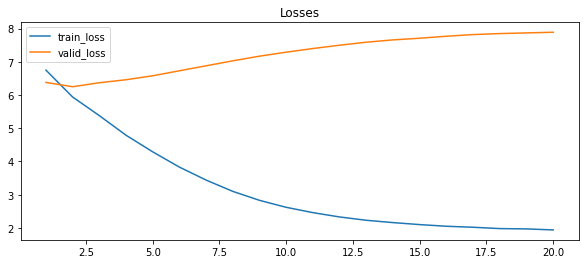

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(list(history.keys()), [value["train_loss"]for value in history.values()], label="train_loss")
plt.plot(list(history.keys()), [value["valid_loss"]for value in history.values()], label="valid_loss")
plt.title("Losses")
plt.legend()
plt.show()

##### Calculate & Plot Perplexity

In [ ]:
import math
for key, values in history.items():
  history[key]["perplexity_train"] = round(math.exp(values["train_loss"]),2)
  history[key]["perplexity_valid"] = round(math.exp(values["valid_loss"]),2)
print(history)  
print("Perplexity_train:",[value["perplexity_train"]for value in history.values()])
print("Perplexity_valid:",[value["perplexity_valid"]for value in history.values()])

{1: {'train_loss': 6.75, 'valid_loss': 6.38, 'perplexity_train': 854.06, 'perplexity_valid': 589.93}, 2: {'train_loss': 5.94, 'valid_loss': 6.25, 'perplexity_train': 379.93, 'perplexity_valid': 518.01}, 3: {'train_loss': 5.38, 'valid_loss': 6.37, 'perplexity_train': 217.02, 'perplexity_valid': 584.06}, 4: {'train_loss': 4.79, 'valid_loss': 6.46, 'perplexity_train': 120.3, 'perplexity_valid': 639.06}, 5: {'train_loss': 4.29, 'valid_loss': 6.58, 'perplexity_train': 72.97, 'perplexity_valid': 720.54}, 6: {'train_loss': 3.83, 'valid_loss': 6.73, 'perplexity_train': 46.06, 'perplexity_valid': 837.15}, 7: {'train_loss': 3.44, 'valid_loss': 6.88, 'perplexity_train': 31.19, 'perplexity_valid': 972.63}, 8: {'train_loss': 3.1, 'valid_loss': 7.03, 'perplexity_train': 22.2, 'perplexity_valid': 1130.03}, 9: {'train_loss': 2.83, 'valid_loss': 7.17, 'perplexity_train': 16.95, 'perplexity_valid': 1299.84}, 10: {'train_loss': 2.62, 'valid_loss': 7.29, 'perplexity_train': 13.74, 'perplexity_valid': 1465

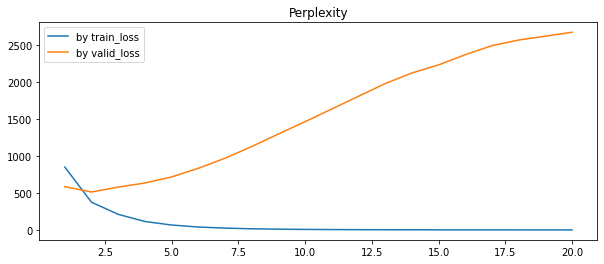

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(list(history.keys()), [value["perplexity_train"]for value in history.values()], label="by train_loss") #, marker="o", visible=True)
plt.plot(list(history.keys()), [value["perplexity_valid"]for value in history.values()], label="by valid_loss") 
plt.title("Perplexity")
#grath.annotate("Test 1", xy=(0.5, 0.5), xycoords="data",va="center", ha="center")
plt.legend()
plt.show()

### Train LM: + 40 epochs

In [ ]:
%cd /content/speechbrain/templates/speech_recognition/LM
device ='cuda' if torch.cuda.is_available() else 'cpu' 
print("device =", device)
!python train_02.py RNNLM_02.yaml --device='$device' --number_of_epochs=60

/content/speechbrain/templates/speech_recognition/LM
device = cpu
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/RNNLM/
root - generating datasets...
datasets.builder - Using custom data configuration default-98412a5464459f4a
datasets.builder - Reusing dataset text (/root/.cache/huggingface/datasets/text/default-98412a5464459f4a/0.0.0/acc32f2f2ef863c93c2f30c52f7df6cc9053a1c2230b8d7da0d210404683ca08)
100% 3/3 [00:00<00:00, 715.87it/s]
speechbrain.core - Info: ckpt_interval_minutes arg from hparam file is used
speechbrain.core - 9.2M trainable parameters in LM_origin
speechbrain.utils.checkpoints - Loading a checkpoint from results/RNNLM/save/CKPT+2022-06-17+10-46-21+00
speechbrain.utils.epoch_loop - Going into epoch 21
100% 66/66 [01:27<00:00,  1.33s/it, train_loss=1.92]
100% 651/651 [00:06<00:00, 101.45it/s]
speechbrain.nnet.schedulers - Changing lr from 1.8e-05 to 1.4e-05
speechbrain.utils.train_logger - epoch: 21, lr: 1.80e-05 - train loss: 1.9

#### Save pretrained models

In [ ]:
from_path_total = '/content/speechbrain/templates/speech_recognition/LM/results/RNNLM/save'
from_path = glob.glob(from_path_total + '/CKPT*')[-1]
!du -h '$from_path'/model.ckpt

36M	/content/speechbrain/templates/speech_recognition/LM/results/RNNLM/save/CKPT+2022-06-17+13-59-32+00/model.ckpt


In [ ]:
!cp '$from_path'/model.ckpt '/content/drive/MyDrive/Colab Notebooks/_My_Projects/Language_modeling/CRDNN_LM_60_epochs.ckpt'

### Train LM - variance temperature GumbeSoftmax

#### RNNLM_03.yaml

In [183]:
%%writefile /content/speechbrain/templates/speech_recognition/LM/RNNLM_03.yaml
# ############################################################################
# Training: RuDataset transcripts
# by original:
# Model: Language model with a recurrent neural network (RNNLM)
# Training: mini-librispeech transcripts
# Authors:  Ju-Chieh Chou 2020, Jianyuan Zhong 2021, Mirco Ravanelli 2021
# ############################################################################

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 2602
__set_seed: !apply:torch.manual_seed [!ref <seed>]
output_folder: !ref results/RNNLM/
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

vocab_size: 8581

# If you plan to train a system on an HPC cluster with a big dataset,
# we strongly suggest doing the following:
# 1- Compress the dataset in a single tar or zip file.
# 2- Copy your dataset locally (i.e., the local disk of the computing node).
# 3- Uncompress the dataset in the local folder.
# 4- Set lm_{train,valid,test}_data with the local path.
# Reading data from the local disk of the compute node (e.g. $SLURM_TMPDIR with SLURM-based clusters) is very important.
# It allows you to read the data much faster without slowing down the shared filesystem.
lm_train_data: data/train_01.txt
lm_valid_data: data/valid_01.txt
lm_test_data: data/test_01.txt

# The train logger writes training statistics to a file, as well as stdout.
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>


# Training parameters
number_of_epochs: 20
batch_size: 80
lr: 0.001
accu_steps: 1 # Gradient accumulation to simulate large batch training
ckpt_interval_minutes: 15 # save checkpoint every N min

# Dataloader options
train_dataloader_opts:
    batch_size: !ref <batch_size>
    shuffle: True

valid_dataloader_opts:
    batch_size: 1

test_dataloader_opts:
    batch_size: 1

# Model parameters
#emb_dim: 256 # dimension of the embeddings - дальше в ASR модели используется 128
emb_dim: 128 # dimension of the embeddings
rnn_size: 256 #512 # dimension of hidden layers
layers: 2 # number of hidden layers

# Outputs
#output_neurons: 1000 # index(blank/eos/bos) = 0
output_neurons: !ref <vocab_size>

blank_index: 0
unk_index: 1
bos_index: 0 #2
eos_index: 0 #3
pad_index: 0


# To design a custom model, either just edit the simple CustomModel
# class that's listed here, or replace this `!new` call with a line
# pointing to a different file you've defined..
#model: !new:templates.speech_recognition.LM.custom_model.CustomModel # error not found custom_model.py
#model: !new:custom_model.CustomModel_01
    #embedding_dim: !ref <emb_dim>
    #rnn_size: !ref <rnn_size>
    #layers: !ref <layers>

# from transformerLM
#log_softmax: !new:speechbrain.nnet.activations.Softmax
#speechbrain.nnet.activations.GumbelSoftmax(tau, hard=False, apply_log=False)
log_softmax: !new:speechbrain.nnet.activations.GumbelSoftmax
    tau: 0.7
    apply_log: True
# Model parameters
emb_size: 128
activation: !name:torch.nn.LeakyReLU
dropout: 0.0
rnn_layers: 2
rnn_neurons: 512 #2048
dnn_blocks: 1
dnn_neurons: 512

# Functions
model: !new:speechbrain.lobes.models.RNNLM.RNNLM
    output_neurons: !ref <output_neurons>
    embedding_dim: !ref  <emb_size>
    activation: !ref <activation>
    dropout: !ref <dropout>
    rnn_layers: !ref <rnn_layers>
    rnn_neurons: !ref <rnn_neurons>
    dnn_blocks: !ref <dnn_blocks>
    dnn_neurons: !ref <dnn_neurons>

#modules:
#    model: !ref <model>

# Cost function used for training the model
compute_cost: !name:speechbrain.nnet.losses.nll_loss

# This optimizer will be constructed by the Brain class after all parameters
# are moved to the correct device. Then it will be added to the checkpointer.
optimizer: !name:torch.optim.Adam
    lr: !ref <lr>
    betas: (0.9, 0.98)
    eps: 0.000000001

# This function manages learning rate annealing over the epochs.
# We here use the NewBoB algorithm, that anneals the learning rate if
# the improvements over two consecutive epochs is less than the defined
# threshold.
lr_annealing: !new:speechbrain.nnet.schedulers.NewBobScheduler
    initial_value: !ref <lr>
    improvement_threshold: 0.0025
    annealing_factor: 0.8
    patient: 0


# The first object passed to the Brain class is this "Epoch Counter"
# which is saved by the Checkpointer so that training can be resumed
# if it gets interrupted at any point.
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

# Objects in "modules" dict will have their parameters moved to the correct
# device, as well as having train()/eval() called on them by the Brain class.
modules:
    model: !ref <model>

# Tokenizer initialization
tokenizer: !new:sentencepiece.SentencePieceProcessor

# Tokenizer model (you must use the same tokenizer for LM and ASR training)
#tokenizer_file: ../Tokenizer/save/1000_unigram.model
tokenizer_file: !ref /content/tokenizer_<vocab_size>_word.model

# This object is used for saving the state of training both so that it
# can be resumed if it gets interrupted, and also so that the best checkpoint
# can be later loaded for evaluation or inference.
checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
    checkpoints_dir: !ref <save_folder>
    recoverables:
        model: !ref <model>
        scheduler: !ref <lr_annealing>
        counter: !ref <epoch_counter>

# Pretrain the tokenizer
pretrainer: !new:speechbrain.utils.parameter_transfer.Pretrainer
    loadables:
        tokenizer: !ref <tokenizer>
    paths:
        tokenizer: !ref <tokenizer_file>


Writing /content/speechbrain/templates/speech_recognition/LM/RNNLM_03.yaml


#### Train LM

In [186]:
%cd /content/speechbrain/templates/speech_recognition/LM
device ='cuda' if torch.cuda.is_available() else 'cpu' 
print("device =", device)
!python train_02.py RNNLM_03.yaml --device='$device' --number_of_epochs=20

/content/speechbrain/templates/speech_recognition/LM
device = cpu
speechbrain.core - Beginning experiment!
speechbrain.core - Experiment folder: results/RNNLM/
root - generating datasets...
datasets.builder - Using custom data configuration default-e4f16cf89ac9a7c3
datasets.builder - Reusing dataset text (/root/.cache/huggingface/datasets/text/default-e4f16cf89ac9a7c3/0.0.0/acc32f2f2ef863c93c2f30c52f7df6cc9053a1c2230b8d7da0d210404683ca08)
100% 3/3 [00:00<00:00, 811.75it/s]
speechbrain.core - Info: ckpt_interval_minutes arg from hparam file is used
speechbrain.core - 9.2M trainable parameters in LM_origin
speechbrain.utils.checkpoints - Loading a checkpoint from results/RNNLM/save/CKPT+2022-06-19+12-54-05+00
speechbrain.utils.epoch_loop - Going into epoch 2
100% 66/66 [02:27<00:00,  2.23s/it, train_loss=9.34]
100% 651/651 [00:11<00:00, 55.86it/s]
speechbrain.utils.train_logger - epoch: 2, lr: 1.00e-03 - train loss: 9.34 - valid loss: 9.71
speechbrain.utils.checkpoints - Saved an end-of-

#### Save pretrained models

In [187]:
from_path_total = '/content/speechbrain/templates/speech_recognition/LM/results/RNNLM/save'
from_path = glob.glob(from_path_total + '/CKPT*')[-1]
!du -h '$from_path'/model.ckpt

36M	/content/speechbrain/templates/speech_recognition/LM/results/RNNLM/save/CKPT+2022-06-19+13-47-55+00/model.ckpt


In [188]:
!cp '$from_path'/model.ckpt '/content/drive/MyDrive/Colab Notebooks/_My_Projects/Language_modeling/CRDNN_LM_GumbelSoftmax_0.7_20_epochs.ckpt'

## Step 4: Inference

#### Load models

##### RNNLM_02_inference.yaml

In [35]:
%%writefile /content/speechbrain/templates/speech_recognition/LM/RNNLM_02_inference.yaml
# ############################################################################
# Training: RuDataset transcripts
# by original:
# Model: Language model with a recurrent neural network (RNNLM)
# Training: mini-librispeech transcripts
# Authors:  Ju-Chieh Chou 2020, Jianyuan Zhong 2021, Mirco Ravanelli 2021
# ############################################################################

# Seed needs to be set at top of yaml, before objects with parameters are made
seed: 2602
__set_seed: !apply:torch.manual_seed [!ref <seed>]
output_folder: !ref results/RNNLM/
save_folder: !ref <output_folder>/save
train_log: !ref <output_folder>/train_log.txt

vocab_size: 8581

# If you plan to train a system on an HPC cluster with a big dataset,
# we strongly suggest doing the following:
# 1- Compress the dataset in a single tar or zip file.
# 2- Copy your dataset locally (i.e., the local disk of the computing node).
# 3- Uncompress the dataset in the local folder.
# 4- Set lm_{train,valid,test}_data with the local path.
# Reading data from the local disk of the compute node (e.g. $SLURM_TMPDIR with SLURM-based clusters) is very important.
# It allows you to read the data much faster without slowing down the shared filesystem.
lm_train_data: data/train_01.txt
lm_valid_data: data/valid_01.txt
lm_test_data: data/test_01.txt

# The train logger writes training statistics to a file, as well as stdout.
train_logger: !new:speechbrain.utils.train_logger.FileTrainLogger
    save_file: !ref <train_log>


# Training parameters
number_of_epochs: 20
batch_size: 80
lr: 0.001
accu_steps: 1 # Gradient accumulation to simulate large batch training
ckpt_interval_minutes: 15 # save checkpoint every N min

# Dataloader options
train_dataloader_opts:
    batch_size: !ref <batch_size>
    shuffle: True

valid_dataloader_opts:
    batch_size: 1

test_dataloader_opts:
    batch_size: 1

# Model parameters
#emb_dim: 256 # dimension of the embeddings - дальше в ASR модели используется 128
emb_dim: 128 # dimension of the embeddings
rnn_size: 256 #512 # dimension of hidden layers
layers: 2 # number of hidden layers

# Outputs
#output_neurons: 1000 # index(blank/eos/bos) = 0
output_neurons: !ref <vocab_size>

blank_index: 0
unk_index: 1
bos_index: 0 #2
eos_index: 0 #3
pad_index: 0


# To design a custom model, either just edit the simple CustomModel
# class that's listed here, or replace this `!new` call with a line
# pointing to a different file you've defined..
#model: !new:templates.speech_recognition.LM.custom_model.CustomModel # error not found custom_model.py
#model: !new:custom_model.CustomModel_01
    #embedding_dim: !ref <emb_dim>
    #rnn_size: !ref <rnn_size>
    #layers: !ref <layers>

# from transformerLM
log_softmax: !new:speechbrain.nnet.activations.Softmax
    apply_log: True
# Model parameters
emb_size: 128
activation: !name:torch.nn.LeakyReLU
dropout: 0.0
rnn_layers: 2
rnn_neurons: 512 #2048
dnn_blocks: 1
dnn_neurons: 512

# Functions
model: !new:speechbrain.lobes.models.RNNLM.RNNLM
    output_neurons: !ref <output_neurons>
    embedding_dim: !ref  <emb_size>
    activation: !ref <activation>
    dropout: !ref <dropout>
    rnn_layers: !ref <rnn_layers>
    rnn_neurons: !ref <rnn_neurons>
    dnn_blocks: !ref <dnn_blocks>
    dnn_neurons: !ref <dnn_neurons>

#modules:
#    model: !ref <model>

# Cost function used for training the model
compute_cost: !name:speechbrain.nnet.losses.nll_loss

# This optimizer will be constructed by the Brain class after all parameters
# are moved to the correct device. Then it will be added to the checkpointer.
optimizer: !name:torch.optim.Adam
    lr: !ref <lr>
    betas: (0.9, 0.98)
    eps: 0.000000001

# This function manages learning rate annealing over the epochs.
# We here use the NewBoB algorithm, that anneals the learning rate if
# the improvements over two consecutive epochs is less than the defined
# threshold.
lr_annealing: !new:speechbrain.nnet.schedulers.NewBobScheduler
    initial_value: !ref <lr>
    improvement_threshold: 0.0025
    annealing_factor: 0.8
    patient: 0


# The first object passed to the Brain class is this "Epoch Counter"
# which is saved by the Checkpointer so that training can be resumed
# if it gets interrupted at any point.
epoch_counter: !new:speechbrain.utils.epoch_loop.EpochCounter
    limit: !ref <number_of_epochs>

# Objects in "modules" dict will have their parameters moved to the correct
# device, as well as having train()/eval() called on them by the Brain class.
modules:
    model: !ref <model>

# Tokenizer initialization
tokenizer: !new:sentencepiece.SentencePieceProcessor

# Tokenizer model (you must use the same tokenizer for LM and ASR training)
#tokenizer_file: ../Tokenizer/save/1000_unigram.model


# This object is used for saving the state of training both so that it
# can be resumed if it gets interrupted, and also so that the best checkpoint
# can be later loaded for evaluation or inference.
#checkpointer: !new:speechbrain.utils.checkpoints.Checkpointer
#    checkpoints_dir: !ref <save_folder>
#    recoverables:
#        model: !ref <model>
#        scheduler: !ref <lr_annealing>
#        counter: !ref <epoch_counter>

tokenizer_file: !ref /content/tokenizer_<vocab_size>_word.model
lm_file: /content/model.ckpt

# Pretrain models
pretrainer: !new:speechbrain.utils.parameter_transfer.Pretrainer
    loadables:
        #tokenizer: !ref <tokenizer> # уже есть в yaml-параметрах
        lm: !ref <model>  # добавляем Language model
    paths:
        #tokenizer: !ref <tokenizer_file> # уже есть в yaml-параметрах
        lm: !ref <lm_file>  # добавляем Language model

Writing /content/speechbrain/templates/speech_recognition/LM/RNNLM_02_inference.yaml


##### Restore Language Model

In [22]:
!cp '/content/drive/MyDrive/Colab Notebooks/_My_Projects/Language_modeling/CRDNN_LM_60_epochs.ckpt' /content/model.ckpt

In [192]:
# Gumbe Softmax
!cp '/content/drive/MyDrive/Colab Notebooks/_My_Projects/Language_modeling/CRDNN_LM_GumbelSoftmax_0.7_20_epochs.ckpt' /content/model2.ckpt

In [31]:
# for checkpointer
#!cp /content/model.ckpt '/content/speechbrain/templates/speech_recognition/LM/results/RNNLM/save/model.ckpt'

In [193]:
%cd /content/speechbrain/templates/speech_recognition/LM/
from train_02 import LM_origin, dataio_prepare
import sys
import logging
import torch
from datasets import load_dataset
from hyperpyyaml import load_hyperpyyaml
import speechbrain as sb

# Инициализация модели -через загрузку pretrained model
# v01 - через отдельный yaml для Inference
#hparams_file = '/content/speechbrain/templates/speech_recognition/LM/RNNLM_02_inference.yaml'

# v02 - через train yaml и  overrides
hparams_file = '/content/speechbrain/templates/speech_recognition/LM/RNNLM_02.yaml'
overrides="""
checkpointer: ~ # or null # https://stackoverflow.com/questions/34089496/empty-field-in-yaml
#lm_file: /content/model.ckpt # Не подходит потому как его не было в train.yaml

pretrainer: !new:speechbrain.utils.parameter_transfer.Pretrainer
    loadables:
        tokenizer: !ref <tokenizer> # уже есть в yaml-параметрах
        model: !ref <model>  # добавляем Language model
    paths:
        tokenizer: !ref <tokenizer_file> # уже есть в yaml-параметрах
        model: !ref /content/model.ckpt  # добавляем Language model
"""        

# v03 - через train yaml и  overrides + GumbelSoftmax
hparams_file = '/content/speechbrain/templates/speech_recognition/LM/RNNLM_03.yaml'
overrides="""
checkpointer: ~ # or null # https://stackoverflow.com/questions/34089496/empty-field-in-yaml
#lm_file: /content/model.ckpt # Не подходит потому как его не было в train.yaml
log_softmax: !new:speechbrain.nnet.activations.GumbelSoftmax
    tau: 0.7
    apply_log: True

pretrainer: !new:speechbrain.utils.parameter_transfer.Pretrainer
    loadables:
        tokenizer: !ref <tokenizer> # уже есть в yaml-параметрах
        model: !ref <model>  # добавляем Language model
    paths:
        tokenizer: !ref <tokenizer_file> # уже есть в yaml-параметрах
        model: !ref /content/model2.ckpt  # добавляем Language model
"""        
device ='cuda' if torch.cuda.is_available() else 'cpu' 
#run_opts = f'device:{device}'
run_opts = {"device":device}
with open(hparams_file) as fin:
        hparams = load_hyperpyyaml(fin, overrides)
lm_brain = LM_origin(
        modules=hparams["modules"],
        opt_class=hparams["optimizer"],
        #pretrainer= hparams["pretrainer"],
        hparams=hparams,
        run_opts=run_opts,
        #checkpointer=hparams["checkpointer"],
)

/content/speechbrain/templates/speech_recognition/LM


In [22]:
#print(hparams.pretrainer)
#print(hparams)
print(hparams["pretrainer"])


In [194]:
#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
run_opts = {"device":device}
from speechbrain.utils.distributed import run_on_main
run_on_main(hparams["pretrainer"].collect_files)
#hparams["pretrainer"].load_collected(device=device)
hparams["pretrainer"].load_collected(device=run_opts["device"])

In [68]:
%cd /content/speechbrain/templates/speech_recognition/LM/
train_data, valid_data, test_data = dataio_prepare(hparams)

/content/speechbrain/templates/speech_recognition/LM


  0%|          | 0/3 [00:00<?, ?it/s]

In [26]:
print(lm_brain.hparams.model)

RNNLM(
  (embedding): Embedding(
    (Embedding): Embedding(8581, 128)
  )
  (dropout): Dropout(p=0.0, inplace=False)
  (rnn): LSTM(
    (rnn): LSTM(128, 512, num_layers=2, batch_first=True)
  )
  (dnn): Sequential(
    (linear): Linear(
      (w): Linear(in_features=512, out_features=512, bias=True)
    )
    (norm): LayerNorm(
      (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    )
    (act): LeakyReLU(negative_slope=0.01)
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (out): Linear(
    (w): Linear(in_features=512, out_features=8581, bias=True)
  )
)


In [26]:
    test_stats = lm_brain.evaluate(
        test_data,
        min_key="loss",
        test_loader_kwargs=hparams["test_dataloader_opts"],
    )
    print(test_stats)

100%|██████████| 651/651 [00:08<00:00, 74.67it/s]

None


In [ ]:
 # v02 Initializate model (by checkpoint - after training in this session)
 lm_brain.fit(
        lm_brain.hparams.epoch_counter,
        train_data,
        valid_data,
        train_loader_kwargs=hparams["train_dataloader_opts"],
        valid_loader_kwargs=hparams["valid_dataloader_opts"],
    )

##### Restore Tokenizer

In [27]:
# v01 - initialization Tokenizer - from yaml parameters
#sp = hparams["tokenizer"]
tokens_list = sp.encode_as_ids(medium_data["title"][0])
tokens_bos = torch.LongTensor([hparams["bos_index"]] + (tokens_list))
print(medium_data["title"][0])
print(tokens_bos)

a beginners guide to word embedding with gensim word2vec model
tensor([   0,    3,  268,   63,    1,  461, 1565,   11, 2863, 8512,   96])


In [28]:
# v02 - initialization Tokenizer - without checkpoint
sp = spm.SentencePieceProcessor()
sp.load('/content/tokenizer_8581_word.model')
tokens_list = sp.encode_as_ids(medium_data["title"][0])
tokens_bos = torch.LongTensor([hparams["bos_index"]] + (tokens_list))
print(medium_data["title"][0])
print(tokens_bos)

a beginners guide to word embedding with gensim word2vec model
tensor([   0,    3,  268,   63,    1,  461, 1565,   11, 2863, 8512,   96])


In [29]:
print(lm_brain.hparams.model(tokens_bos.to(device)).size())
output = lm_brain.hparams.model(tokens_bos.to(device))
print(output[0].size())
print(output[0][:10])
print(max(output[0]), torch.argmax(output[0]) )

torch.Size([11, 8581])
torch.Size([8581])
tensor([ 0.0935,  0.4670, -0.7049,  0.2428, -0.6527,  0.2568,  0.2491, -0.2509,
         0.0093,  0.0530], grad_fn=<SliceBackward0>)
tensor(1.6542, grad_fn=<UnbindBackward0>) tensor(7950)


#### LM_decoders

##### Simple Decoder

###### Softmax simple

In [131]:
def LM_decoder_simple(model, sp, bos_id, text):
    print("source:", text)
    tokens_list = sp.encode_as_ids(text)
    print("tokens_list", tokens_list)
    tokens_bos = torch.LongTensor([bos_id] + (tokens_list))
    predictions = model(tokens_bos)
    #print(predictions.size())
    pred_ids = [int(np.argmax(s,axis=-1)) for s in predictions.detach().numpy()]
    print("pred_ids", pred_ids)
    pred_text = sp.decode_ids(pred_ids)
    print("predict:", pred_text)
    return pred_text
#pred_text = LM_decoder_simple(lm_brain.hparams.model, sp, hparams["bos_index"], medium_data["title"][1])  
pred_text = LM_decoder_simple(lm_brain.hparams.model, sp, hparams["bos_index"], medium_data["title"][1])  



source: handson graph neural networks with pytorch  pytorch geometric
tokens_list [5559, 735, 78, 99, 11, 337, 337, 2047]
pred_ids [6, 7, 2, 99, 0, 2, 11, 11, 7]
predict: how in the networks ⁇  the with with in


In [28]:
file_name = '/content/speechbrain/templates/speech_recognition/LM/data/train_01.txt'
with open(file_name, 'r') as f:
  txts = f.readlines()


In [29]:
line = txts[np.random.randint(len(txts))]
pred_text = LM_decoder_simple(lm_brain.hparams.model, sp, hparams["bos_index"], line)  

source: how to live in the present and make your time count

tokens_list [6, 1, 370, 7, 2, 2230, 5, 44, 8, 58, 1268]
pred_ids [6, 1, 2, 7, 2, 83, 1, 6, 2, 450, 0, 0]
predict: how to the in the future to how the phone ⁇  ⁇ 


###### Softmax Gumbe

In [195]:
def LM_decoder_simple(model, sp, bos_id, text):
    print("source:", text)
    tokens_list = sp.encode_as_ids(text)
    print("tokens_list", tokens_list)
    tokens_bos = torch.LongTensor([bos_id] + (tokens_list))
    predictions = model(tokens_bos)
    #print(predictions.size())
    pred_ids = [int(np.argmax(s,axis=-1)) for s in predictions.detach().numpy()]
    print("pred_ids", pred_ids)
    pred_text = sp.decode_ids(pred_ids)
    print("predict:", pred_text)
    return pred_text
#pred_text = LM_decoder_simple(lm_brain.hparams.model, sp, hparams["bos_index"], medium_data["title"][1])  
pred_text = LM_decoder_simple(lm_brain.hparams.model, sp, hparams["bos_index"], medium_data["title"][1])  



source: handson graph neural networks with pytorch  pytorch geometric
tokens_list [5559, 735, 78, 99, 11, 337, 337, 2047]
pred_ids [6, 7, 2, 99, 0, 2, 11, 11, 7]
predict: how in the networks ⁇  the with with in


In [196]:
file_name = '/content/speechbrain/templates/speech_recognition/LM/data/train_01.txt'
with open(file_name, 'r') as f:
  txts = f.readlines()


In [199]:
line = txts[np.random.randint(len(txts))]
pred_text = LM_decoder_simple(lm_brain.hparams.model, sp, hparams["bos_index"], line)  

source: deeppicar  part 3 make picar see and think

tokens_list [1960, 55, 52, 44, 3244, 769, 5, 238]
pred_ids [6, 0, 90, 144, 2, 3, 3, 6, 2]
predict: how ⁇  1 reasons the a a how the


##### Greedy Search Decoder

###### Softmax Simple

In [201]:
def LM_decoder_greedy_search(model, sp, bos_id, text):
    tokens_list = sp.encode_as_ids(text)
    tokens_bos = torch.LongTensor([bos_id] + (tokens_list))
    pred_text = ''
    for i in range(len(tokens_bos)):
        predictions = model(tokens_bos[i:i+2])
        #print(predictions.size())
        pred_ids = [int(np.argmax(s,axis=-1)) for s in predictions.detach().numpy()]
        #print(pred_ids)
        pred_text += " " + sp.decode_ids([pred_ids[-1]])
        #print(pred_text)
    return pred_text
line = txts[np.random.randint(len(txts))]
pred_text = LM_decoder_greedy_search(lm_brain.hparams.model, sp, hparams["bos_index"], line)  
print("source:", line)
print("predict:", pred_text)

source: using ant colony and genetic evolution to optimize ridesharing trip duration

predict:  python  ⁇  a how how in the the in about in in


###### Softmax Gumbe

In [208]:
def LM_decoder_greedy_search(model, sp, bos_id, text):
    tokens_list = sp.encode_as_ids(text)
    tokens_bos = torch.LongTensor([bos_id] + (tokens_list))
    pred_text = ''
    for i in range(len(tokens_bos)):
        predictions = model(tokens_bos[i:i+2])
        #print(predictions.size())
        pred_ids = [int(np.argmax(s,axis=-1)) for s in predictions.detach().numpy()]
        #print(pred_ids)
        pred_text += " " + sp.decode_ids([pred_ids[-1]])
        #print(pred_text)
    return pred_text
line = txts[np.random.randint(len(txts))]
pred_text = LM_decoder_greedy_search(lm_brain.hparams.model, sp, hparams["bos_index"], line)  
print("source:", line)
print("predict:", pred_text)

source: the counterintuitive perils and promises of the digital world

predict:  future a  ⁇  how with the future transformation  ⁇   ⁇ 


##### BeamSearch Decoder
by https://towardsdatascience.com/foundations-of-nlp-explained-visually-beam-search-how-it-works-1586b9849a24

https://huggingface.co/blog/how-to-generate

In [ ]:
line = txts[np.random.randint(len(txts))]
pred_text = LM_decoder_beam_search(lm_brain.hparams.model, line, tokenizer=sp, bos_id=hparams["bos_index"], eos_id=hparams["eos_index"])  
print("source:", line)
print("predict:", pred_text)

In [146]:
model(tokens_bos).size()

torch.Size([9, 8581])

In [170]:
def LM_decoder_beam_search( text_line, 
                           model=lm_brain.hparams.model,
                           max_next_words = 3,
                           width__num_beams = 2,
                           tokenizer=sp, 
                           bos_id=hparams["bos_index"], 
                           eos_id=hparams["eos_index"],
                           debug=True):
    
    
    tokens_list = tokenizer.encode_as_ids(text_line)
    if debug: print("tokens_list", tokens_list) 
    tokens_bos = torch.LongTensor([bos_id] + (tokens_list))
    beams = torch.tensor([[], [0.0]])
    start = 2
    
    # step 1
    if debug: print("step 1")  
    #print(tokens_bos)
    output = model(tokens_bos)
    if debug: print(output.size())

    probs_indices = torch.topk(output[:,:], width__num_beams, dim=-1)
    probs, indices = probs_indices[0][0],probs_indices[1][0]
    if debug: print(probs, indices)

    #tracks = torch.asarray([[[], 0.0],[[],0.0]])
    tracks = {}
    
    for beam in range(width__num_beams):
        tracks[beam] = {}
        tracks[beam]["probs"] = [probs[beam].detach()]
        tracks[beam]["total_prob"] = probs[beam].detach()
        tracks[beam]["indices"] = [indices[beam]]
        tracks[beam]["ids"] = torch.cat((torch.tensor(tokens_list), torch.tensor(tracks[beam]["indices"])) )
        tracks[beam]["text"]= " ".join([tokenizer.decode_ids([int(item)]) for item in tracks[beam]["ids"] ])
    if debug: print("tracks", tracks)                        
    if debug: print()
    
    # step 2..end
    for step in range(2,max_next_words+1,1):
      if debug: print("step", step)
      t_tracks = {}
      t_total_probs = {}
      max_probs_beams = width__num_beams*[width__num_beams*[-1]]
      #print("max_probs_beams", max_probs_beams)
      max_probs = torch.tensor(width__num_beams*[-torch.inf])
      for beam in range(width__num_beams):
          #seed_ids_ds = batchify(torch.cat((seed_ids,tracks[beam]["ids"])), batch_size)
          #seed_ids_ds = batchify(tracks[beam]["ids"], batch_size)
          #output = model(seed_ids_ds, src_mask)
          tokens_bos = torch.LongTensor(torch.tensor([bos_id]) + (tracks[beam]["ids"]))
          output = model(tokens_bos)
          #if debug: print("output.size", output.size())
          probs_indices = torch.topk(output[-1,:], width__num_beams, dim=-1)
          #probs, indices = probs_indices[0][0],probs_indices[1][0]
          probs, indices = probs_indices[0],probs_indices[1]
          t_tracks[beam] = {}
          t_total_probs[beam] = {}
          
          #t_total_probs[beam] = tracks[beam]["total_prob"]
          for beam2 in range(width__num_beams):
              t_tracks[beam][beam2] = {}
              t_tracks[beam][beam2]["probs"] = probs[beam2].detach()
              t_total_probs[beam][beam2]=tracks[beam]["total_prob"] + probs[beam2].detach() # для более простой проверки
              #t_total_probs[beam][beam2]=tracks[beam]["total_prob"] * probs[beam2].detach()
              t_tracks[beam][beam2]["indices"] = [indices[beam2]]
              t_tracks[beam][beam2]["ids"] = torch.cat((torch.tensor(tracks[beam]["ids"]), torch.tensor(t_tracks[beam][beam2]["indices"])) )
              t_tracks[beam][beam2]["text"]= " ".join([tokenizer.decode_ids([int(item)]) for item in t_tracks[beam][beam2]["ids"]])
              #t_tracks[beam][beam2]["text"]= " ".join([tokenizer.id_to_piece(int(item)) for item in t_tracks[beam][beam2]["ids"]])
              # id_to_piece возвращает ▁magic
          
      if debug: print("t_tracks",t_tracks)        
      if debug: print("t_total_probs", t_total_probs)   
      # t_total_probs_t = [ vv for v in t_total_probs.values() for vv in v.values()]
      #torch.topk(torch.tensor(t_total_probs.values().numpy()), width, dim=-1)             

      for beam in range(width__num_beams):
          for beam2 in range(width__num_beams):
              if t_total_probs[beam][beam2]> max_probs[beam]:
                  max_probs[beam] = t_total_probs[beam][beam2]
                  max_probs_beams[beam] = [beam,beam2]
      if debug: print("max_probs_beams", max_probs_beams)
      if debug: print("max_probs", max_probs)
      
      for beam in range(width__num_beams):
          tracks[beam]["ids"] = t_tracks[beam][max_probs_beams[beam][1]]["ids"] # полная запись
          tracks[beam]["indices"] += t_tracks[beam][max_probs_beams[beam][1]]["indices"]
          tracks[beam]["probs"] += [t_tracks[beam][max_probs_beams[beam][1]]["probs"]]
          #tracks[beam]["total_prob"] += t_tracks[beam][max_probs_beams[beam][1]]["probs"]
          tracks[beam]["total_prob"] = t_total_probs[beam][max_probs_beams[beam][1]]
          tracks[beam]["text"]= " ".join([tokenizer.decode_ids([int(item)]) for item in tracks[beam]["ids"]])
      if debug: print("tracks",tracks)
      if debug: print()
    max_prob = -torch.inf
    for beam in range(width__num_beams):
        if tracks[beam]["total_prob"] > max_prob:
            max_prob = tracks[beam]["total_prob"]
            pred_text = tracks[beam]["text"]
    
    print("seed_text:", text_line)
    print("pred_text:", pred_text)
    print("max_prob:", max_prob.detach().numpy())
    
    return pred_text

###### Softmax Simple

In [182]:
#text_line = txts[np.random.randint(len(txts))]
text_line = "review hypercolumn instance segmentatio"
print(len(text_line.split()), text_line)
LM_decoder_beam_search( text_line, model=lm_brain.hparams.model,tokenizer=sp, 
                        max_next_words = 3,width__num_beams = 2,
                        bos_id=hparams["bos_index"], eos_id=hparams["eos_index"],
                       debug=True)

4 review hypercolumn instance segmentatio
tokens_list [275, 5693, 836, 0]
step 1
torch.Size([5, 8581])
tensor([1.8079, 1.6254], grad_fn=<SelectBackward0>) tensor([6, 2])
tracks {0: {'probs': [tensor(1.8079)], 'total_prob': tensor(1.8079), 'indices': [tensor(6)], 'ids': tensor([ 275, 5693,  836,    0,    6]), 'text': 'review hypercolumn instance  ⁇  how'}, 1: {'probs': [tensor(1.6254)], 'total_prob': tensor(1.6254), 'indices': [tensor(2)], 'ids': tensor([ 275, 5693,  836,    0,    2]), 'text': 'review hypercolumn instance  ⁇  the'}}

step 2
t_tracks {0: {0: {'probs': tensor(-0.2148), 'indices': [tensor(1)], 'ids': tensor([ 275, 5693,  836,    0,    6,    1]), 'text': 'review hypercolumn instance  ⁇  how to'}, 1: {'probs': tensor(-2.7876), 'indices': [tensor(18)], 'ids': tensor([ 275, 5693,  836,    0,    6,   18]), 'text': 'review hypercolumn instance  ⁇  how i'}}, 1: {0: {'probs': tensor(-4.9376), 'indices': [tensor(83)], 'ids': tensor([ 275, 5693,  836,    0,    2,   83]), 'text': 're

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


'review hypercolumn instance  ⁇  how to the'

###### Softmax Gumbe tau=0.7

In [204]:
#text_line = txts[np.random.randint(len(txts))]
text_line = "review hypercolumn instance segmentation"
print(len(text_line.split()), text_line)
LM_decoder_beam_search( text_line, model=lm_brain.hparams.model,tokenizer=sp, 
                        max_next_words = 5,width__num_beams = 2,
                        bos_id=hparams["bos_index"], eos_id=hparams["eos_index"],
                       debug=True)

4 review hypercolumn instance segmentation
tokens_list [275, 5693, 836, 401]
step 1
torch.Size([5, 8581])
tensor([1.8079, 1.6254], grad_fn=<SelectBackward0>) tensor([6, 2])
tracks {0: {'probs': [tensor(1.8079)], 'total_prob': tensor(1.8079), 'indices': [tensor(6)], 'ids': tensor([ 275, 5693,  836,  401,    6]), 'text': 'review hypercolumn instance segmentation how'}, 1: {'probs': [tensor(1.6254)], 'total_prob': tensor(1.6254), 'indices': [tensor(2)], 'ids': tensor([ 275, 5693,  836,  401,    2]), 'text': 'review hypercolumn instance segmentation the'}}

step 2
t_tracks {0: {0: {'probs': tensor(-0.2148), 'indices': [tensor(1)], 'ids': tensor([ 275, 5693,  836,  401,    6,    1]), 'text': 'review hypercolumn instance segmentation how to'}, 1: {'probs': tensor(-2.7876), 'indices': [tensor(18)], 'ids': tensor([ 275, 5693,  836,  401,    6,   18]), 'text': 'review hypercolumn instance segmentation how i'}}, 1: {0: {'probs': tensor(-4.9376), 'indices': [tensor(83)], 'ids': tensor([ 275, 5693

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


t_tracks {0: {0: {'probs': tensor(-4.9376), 'indices': [tensor(83)], 'ids': tensor([ 275, 5693,  836,  401,    6,    1,    2,   83]), 'text': 'review hypercolumn instance segmentation how to the future'}, 1: {'probs': tensor(-4.9472), 'indices': [tensor(69)], 'ids': tensor([ 275, 5693,  836,  401,    6,    1,    2,   69]), 'text': 'review hypercolumn instance segmentation how to the best'}}, 1: {0: {'probs': tensor(-2.2263), 'indices': [tensor(2)], 'ids': tensor([ 275, 5693,  836,  401,    2,   83,    4,    2]), 'text': 'review hypercolumn instance segmentation the future of the'}, 1: {'probs': tensor(-3.2193), 'indices': [tensor(8)], 'ids': tensor([ 275, 5693,  836,  401,    2,   83,    4,    8]), 'text': 'review hypercolumn instance segmentation the future of your'}}}
t_total_probs {0: {0: tensor(-7.3964), 1: tensor(-7.4060)}, 1: {0: tensor(-4.9430), 1: tensor(-5.9361)}}
max_probs_beams [[0, 0], [1, 0]]
max_probs tensor([-7.3964, -4.9430])
tracks {0: {'probs': [tensor(1.8079), tensor

'review hypercolumn instance segmentation how to the future of'

#### Top-K, Top-P Sampling - under development
by https://towardsdatascience.com/how-to-sample-from-language-models-682bceb97277
https://colab.research.google.com/drive/1BBJPKYsgheHcCH0JAqLZ49UXHDk4XzX7#scrollTo=I_hU9ytugB57